<a href="https://colab.research.google.com/github/dibidimi/DesignProject/blob/main/230705_DesignProject_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Smoothing spatial filter

- Spatial Filtering
- Padding
- Box filter
- Gaussian smoothing filter
- Sobel filter

 ** import library

In [2]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1) Spatial Filtering and Padding

In [3]:
def Spatial_filtering(img, kernel, padding, option):

    (N, M) = img.shape
    (n, m) = kernel.shape

    if padding == 1:
        padded_img = np.zeros((N+n-1, M+m-1))
        padded_img[int((n-1)/2):int(N+(n-1)/2), int((m-1)/2):int(M+(m-1)/2)] = img
        input_img = padded_img
    else:
        input_img = img

    (input_N, input_M) = input_img.shape

    output = np.zeros((input_N, input_M))

    for i in range (input_N-(n-1)):
        for j in range(input_M-(m-1)):
            output[i, j] = np.sum(input_img[i:i+n, j:j+m]*kernel[:, :])

    if(padding == 1):
        output = output[0:N, 0:M]
    else:
        output = output[0:N-n+1, 0:M-m+1]

    if option == 1:
      output = np.where(output < 0, 0, np.where(output > 255, 255, output))
      output = abs(output).astype(np.uint8)

    return output


## 1.2) Box filter

In [4]:
def Boxfilter(n, m):
    output = np.ones((n, m))/(n*m)
    return output

Original Image
이미지 차원 :  2
이미지 크기 :  (512, 512)
이미지 전체 요소 개수 :  262144
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


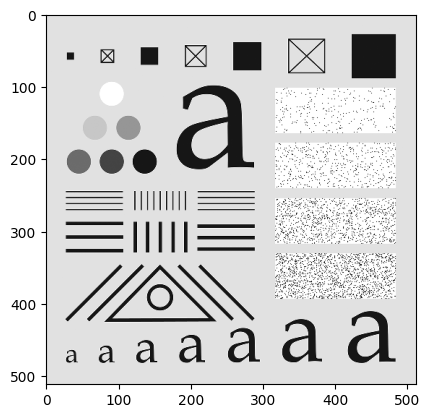

In [242]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/testpattern512.tif'

img_testpattern512 = mpimg.imread(fname)
plt.imshow(img_testpattern512, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_testpattern512.ndim)
print('이미지 크기 : ',img_testpattern512.shape)
print('이미지 전체 요소 개수 : ',img_testpattern512.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_testpattern512.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_testpattern512.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
Boxfilter 3x3
이미지 차원 :  2
이미지 크기 :  (510, 510)
이미지 전체 요소 개수 :  260100
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


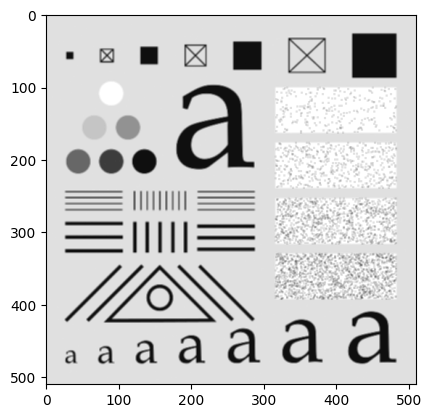

In [243]:
# Boxfilter 3X3
Boxfilter_3x3 = Boxfilter(3, 3)
img_Boxfilter_3x3 = Spatial_filtering(img_testpattern512, Boxfilter_3x3, 0, 1)
plt.figure()
plt.imshow(img_Boxfilter_3x3, cmap='gray')
print('------------------------------------------------')
print("Boxfilter 3x3")
print('이미지 차원 : ',img_Boxfilter_3x3.ndim)
print('이미지 크기 : ',img_Boxfilter_3x3.shape)
print('이미지 전체 요소 개수 : ',img_Boxfilter_3x3.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Boxfilter_3x3.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Boxfilter_3x3.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
Boxfilter 19x19
이미지 차원 :  2
이미지 크기 :  (494, 494)
이미지 전체 요소 개수 :  244036
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


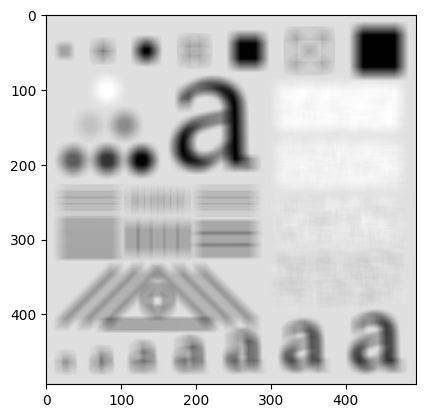

In [244]:
# Boxfilter 19X19
Boxfilter_19x19 = Boxfilter(19, 19)
img_Boxfilter_19x19 = Spatial_filtering(img_testpattern512, Boxfilter_19x19, 0, 1)
plt.figure()
plt.imshow(img_Boxfilter_19x19, cmap='gray')
print('------------------------------------------------')
print("Boxfilter 19x19")
print('이미지 차원 : ',img_Boxfilter_19x19.ndim)
print('이미지 크기 : ',img_Boxfilter_19x19.shape)
print('이미지 전체 요소 개수 : ',img_Boxfilter_19x19.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Boxfilter_19x19.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Boxfilter_19x19.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
Boxfilter 25x25
이미지 차원 :  2
이미지 크기 :  (488, 488)
이미지 전체 요소 개수 :  238144
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


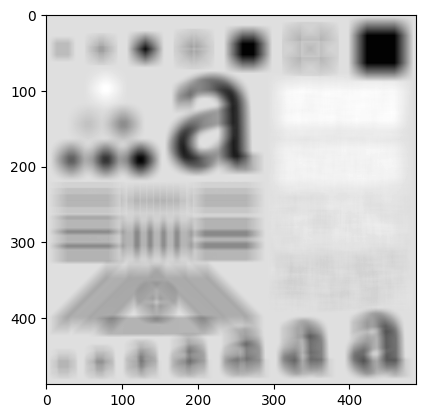

In [245]:
# Boxfilter 25X25
Boxfilter_25x25 = Boxfilter(25, 25)
img_Boxfilter_25x25 = Spatial_filtering(img_testpattern512, Boxfilter_25x25, 0, 1)
plt.figure()
plt.imshow(img_Boxfilter_25x25, cmap='gray')
print('------------------------------------------------')
print("Boxfilter 25x25")
print('이미지 차원 : ',img_Boxfilter_25x25.ndim)
print('이미지 크기 : ',img_Boxfilter_25x25.shape)
print('이미지 전체 요소 개수 : ',img_Boxfilter_25x25.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Boxfilter_25x25.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Boxfilter_25x25.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
Boxfilter 25x25 PADDING
이미지 차원 :  2
이미지 크기 :  (512, 512)
이미지 전체 요소 개수 :  262144
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


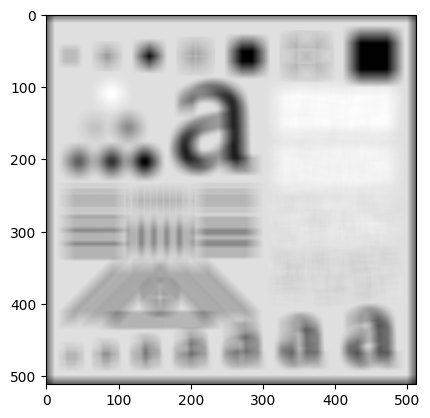

In [246]:
#padding
# Boxfilter 25X25
Boxfilter_25x25 = Boxfilter(25, 25)
img_Boxfilter_25x25_padded = Spatial_filtering(img_testpattern512, Boxfilter_25x25, 1, 1)
plt.figure()
plt.imshow(img_Boxfilter_25x25_padded, cmap='gray')
print('------------------------------------------------')
print("Boxfilter 25x25 PADDING")
print('이미지 차원 : ',img_Boxfilter_25x25_padded.ndim)
print('이미지 크기 : ',img_Boxfilter_25x25_padded.shape)
print('이미지 전체 요소 개수 : ',img_Boxfilter_25x25_padded.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Boxfilter_25x25_padded.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Boxfilter_25x25_padded.itemsize) # 각 요소의 크기가 1바이트

## 1.3) Gaussian smoothing filter

In [5]:
def GaussianFilter(k, sig):
    n = 6*abs(sig)+1
    output = np.zeros((n, n))
    for i in range (n):
        for j in range(n):
            x = i-((n-1)/2)
            y = j-((n-1)/2)
            output[i, j] = k*np.exp(-(x**2+y**2)/(2*sig**2))
    output = output/np.sum(output)

    return output

------------------------------------------------
GaussianFilter_sig_3
이미지 차원 :  2
이미지 크기 :  (494, 494)
이미지 전체 요소 개수 :  244036
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


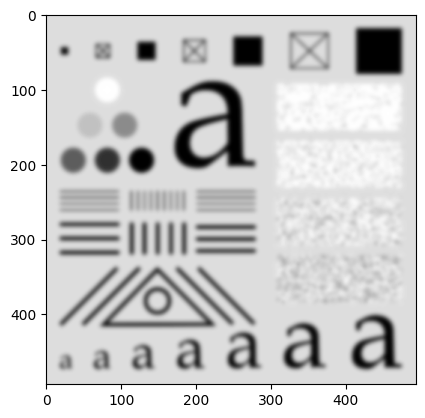

In [248]:
#No padding
# GaussianFilter
GaussianFilter_sig_3 = GaussianFilter(1, 3)
img_GaussianFilter_sig_3 = Spatial_filtering(img_testpattern512, GaussianFilter_sig_3, 0, 1)
plt.figure()
plt.imshow(img_GaussianFilter_sig_3, cmap='gray')
print('------------------------------------------------')
print("GaussianFilter_sig_3")
print('이미지 차원 : ',img_GaussianFilter_sig_3.ndim)
print('이미지 크기 : ',img_GaussianFilter_sig_3.shape)
print('이미지 전체 요소 개수 : ',img_GaussianFilter_sig_3.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_GaussianFilter_sig_3.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_GaussianFilter_sig_3.itemsize) # 각 요소의 크기가 1바이트


------------------------------------------------
GaussianFilter_sig_7
이미지 차원 :  2
이미지 크기 :  (470, 470)
이미지 전체 요소 개수 :  220900
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


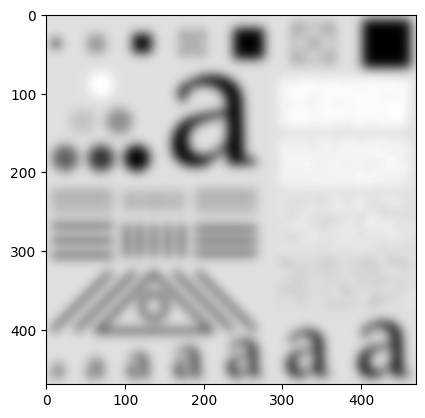

In [249]:
# GaussianFilter_sig_7
GaussianFilter_sig_7 = GaussianFilter(1, 7)
img_GaussianFilter_sig_7 = Spatial_filtering(img_testpattern512, GaussianFilter_sig_7, 0, 1)
plt.figure()
plt.imshow(img_GaussianFilter_sig_7, cmap='gray')
print('------------------------------------------------')
print("GaussianFilter_sig_7")
print('이미지 차원 : ',img_GaussianFilter_sig_7.ndim)
print('이미지 크기 : ',img_GaussianFilter_sig_7.shape)
print('이미지 전체 요소 개수 : ',img_GaussianFilter_sig_7.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_GaussianFilter_sig_7.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_GaussianFilter_sig_7.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
GaussianFilter_sig_7 PADDING
이미지 차원 :  2
이미지 크기 :  (512, 512)
이미지 전체 요소 개수 :  262144
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


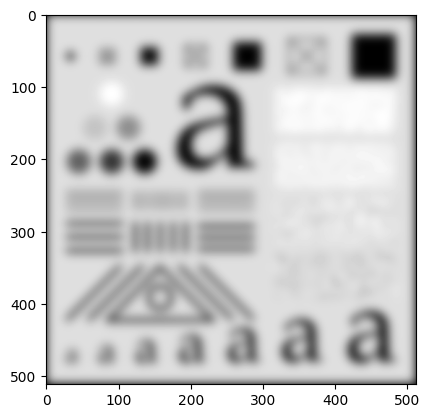

In [250]:
#padding

# GaussianFilter_sig_7
GaussianFilter_sig_7 = GaussianFilter(1, 7)
img_GaussianFilter_sig_7_padded = Spatial_filtering(img_testpattern512, GaussianFilter_sig_7, 1, 1)
plt.figure()
plt.imshow(img_GaussianFilter_sig_7_padded, cmap='gray')
print('------------------------------------------------')
print("GaussianFilter_sig_7 PADDING")
print('이미지 차원 : ',img_GaussianFilter_sig_7_padded.ndim)
print('이미지 크기 : ',img_GaussianFilter_sig_7_padded.shape)
print('이미지 전체 요소 개수 : ',img_GaussianFilter_sig_7_padded.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_GaussianFilter_sig_7_padded.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_GaussianFilter_sig_7_padded.itemsize) # 각 요소의 크기가 1바이트

## 1.4) Sobel filter

In [6]:
def Sobelfilter(option):
    #horizontal
    output = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    #vertical
    if option == 1:
        output = np.rot90(output)

    return output

Original Image
이미지 차원 :  2
이미지 크기 :  (932, 937)
이미지 전체 요소 개수 :  873284
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


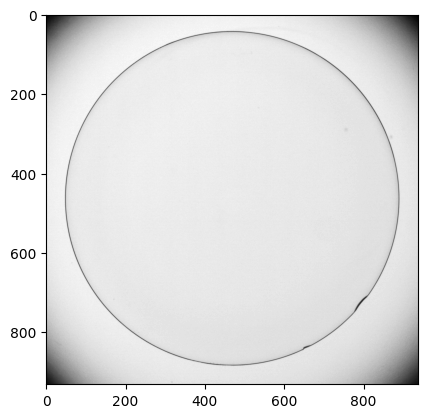

In [252]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/contact-lens.tif'

img_contactLens = mpimg.imread(fname)
plt.imshow(img_contactLens, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_contactLens.ndim)
print('이미지 크기 : ',img_contactLens.shape)
print('이미지 전체 요소 개수 : ',img_contactLens.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_contactLens.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_contactLens.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
GaussianFilter_sig_3
이미지 차원 :  2
이미지 크기 :  (930, 935)
이미지 전체 요소 개수 :  869550
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


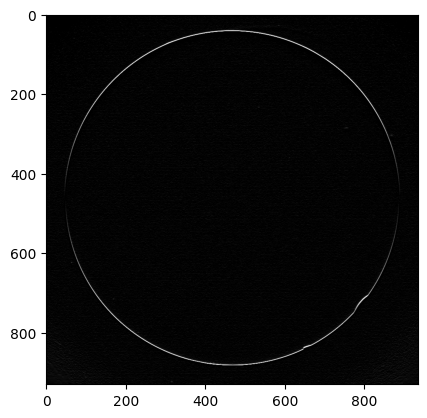

In [253]:
# Sobelfilter_horizontal
Sobelfilter_horizontal = Sobelfilter(0)
img_Sobelfilter_horizontal = Spatial_filtering(img_contactLens, Sobelfilter_horizontal, 0, 1)
plt.figure()
plt.imshow(img_Sobelfilter_horizontal, cmap='gray')
print('------------------------------------------------')
print("GaussianFilter_sig_3")
print('이미지 차원 : ',img_Sobelfilter_horizontal.ndim)
print('이미지 크기 : ',img_Sobelfilter_horizontal.shape)
print('이미지 전체 요소 개수 : ',img_Sobelfilter_horizontal.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Sobelfilter_horizontal.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Sobelfilter_horizontal.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
Sobelfilter_vertical
이미지 차원 :  2
이미지 크기 :  (930, 935)
이미지 전체 요소 개수 :  869550
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


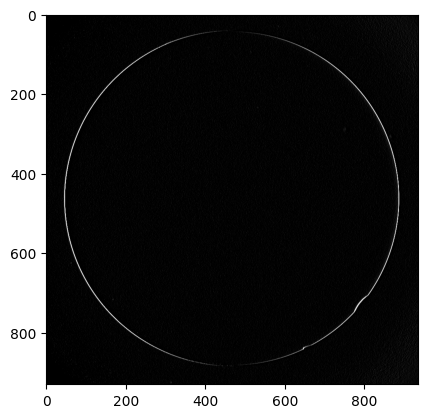

In [254]:
# Sobelfilter_vertical
Sobelfilter_vertical = Sobelfilter(1)
img_Sobelfilter_vertical = Spatial_filtering(img_contactLens, Sobelfilter_vertical, 0, 1)
plt.figure()
plt.imshow(img_Sobelfilter_vertical, cmap='gray')
print('------------------------------------------------')
print("Sobelfilter_vertical")
print('이미지 차원 : ',img_Sobelfilter_vertical.ndim)
print('이미지 크기 : ',img_Sobelfilter_vertical.shape)
print('이미지 전체 요소 개수 : ',img_Sobelfilter_vertical.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Sobelfilter_vertical.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Sobelfilter_vertical.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
GaussianFilter_sig_7 PADDING
이미지 차원 :  2
이미지 크기 :  (930, 935)
이미지 전체 요소 개수 :  869550
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


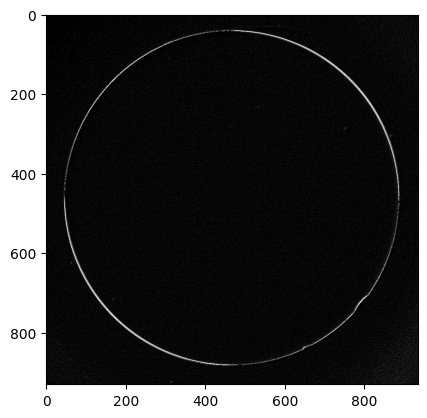

In [255]:
# Sobelfilter
img_Sobelfilter = (img_Sobelfilter_vertical+img_Sobelfilter_horizontal).astype(np.uint8)
plt.figure()
plt.imshow(img_Sobelfilter, cmap='gray')
print('------------------------------------------------')
print("GaussianFilter_sig_7 PADDING")
print('이미지 차원 : ',img_Sobelfilter.ndim)
print('이미지 크기 : ',img_Sobelfilter.shape)
print('이미지 전체 요소 개수 : ',img_Sobelfilter.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Sobelfilter.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Sobelfilter.itemsize) # 각 요소의 크기가 1바이트


# 2. Morphological Image Processing
- Dilation
- Erosion
- Opening
- Closing

## 2.1) Dilation

In [256]:
def Dilation(img, structure, padding):
    (N, M) = img.shape
    (n, m) = structure.shape

    if padding == 1:
        padded_img = np.zeros((N+n-1, M+m-1))
        padded_img[int((n-1)/2):int(N+(n-1)/2), int((m-1)/2):int(M+(m-1)/2)] = img
        input_img = padded_img
    else:
        input_img = img

    (input_N, input_M) = input_img.shape
    output = np.zeros((input_N, input_M))

    for i in range (input_N-(n-1)):
        for j in range(input_M-(m-1)):
            output[i, j] = np.sum(input_img[i:i+n, j:j+m]*structure[:, :])
            if(output[i, j])>1:
                output[i, j] = 255
            else:
                output[i, j] = 0

    if(padding == 1):
        output = output[0:N, 0:M]
    else:
        output = output[0:N-n+1, 0:M-m+1]

    output = output.astype(np.uint8)

    return output

Original Image
이미지 차원 :  2
이미지 크기 :  (889, 1019)
이미지 전체 요소 개수 :  905891
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


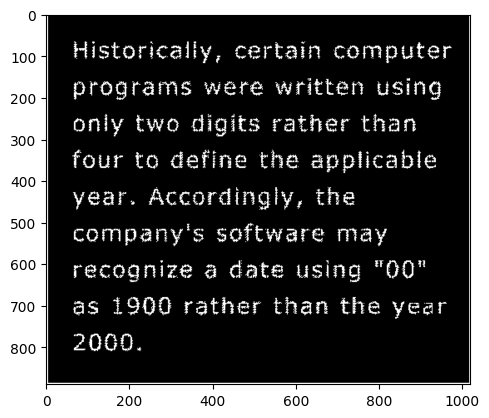

In [257]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/text-broken.tif'
TextBroken = cv2.imread(fname, cv2.IMREAD_GRAYSCALE) ## 원본이미지는 RGB
plt.figure()
plt.imshow(TextBroken, cmap='gray')
print("Original Image")
print('이미지 차원 : ',TextBroken.ndim)
print('이미지 크기 : ',TextBroken.shape)
print('이미지 전체 요소 개수 : ',TextBroken.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',TextBroken.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',TextBroken.itemsize) # 각 요소의 크기가 1바이트

Dilation_1
이미지 차원 :  2
이미지 크기 :  (885, 1015)
이미지 전체 요소 개수 :  898275
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


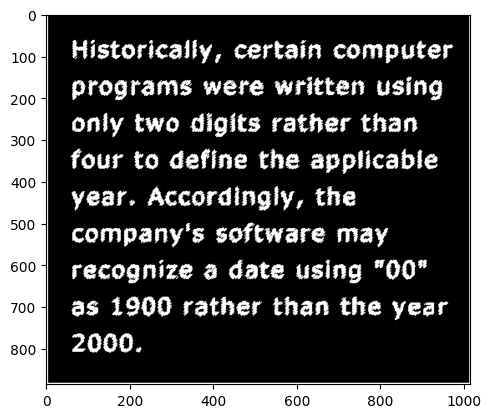

In [258]:
# Dilation
structure_1 = np.array([[0, 0, 0, 0, 1],[0, 0, 0, 1, 0],[0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]])
img_Dilation_1 = Dilation(TextBroken, structure_1, 0)
plt.figure()
plt.imshow(img_Dilation_1, cmap='gray')
print("Dilation_1")
print('이미지 차원 : ', img_Dilation_1.ndim)
print('이미지 크기 : ', img_Dilation_1.shape)
print('이미지 전체 요소 개수 : ', img_Dilation_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Dilation_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Dilation_1.itemsize) # 각 요소의 크기가 1바이트


------------------------------------------------
Dilation_2
이미지 차원 :  2
이미지 크기 :  (887, 1017)
이미지 전체 요소 개수 :  902079
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


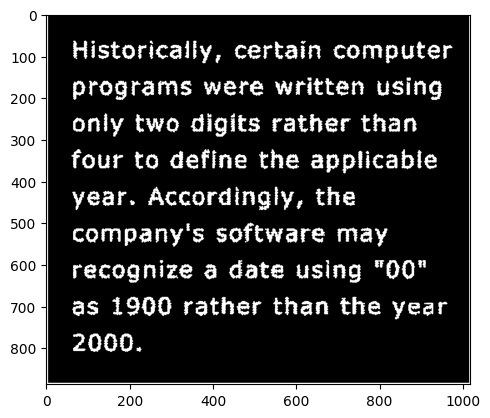

In [260]:
# Dilation
structure_2 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]])
img_Dilation_2 = Dilation(TextBroken, structure_2, 0)
plt.figure()
plt.imshow(img_Dilation_2, cmap='gray')
print('------------------------------------------------')
print("Dilation_2")
print('이미지 차원 : ', img_Dilation_2.ndim)
print('이미지 크기 : ', img_Dilation_2.shape)
print('이미지 전체 요소 개수 : ', img_Dilation_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Dilation_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Dilation_2.itemsize) # 각 요소의 크기가 1바이트

## 2.2) Erosion

In [261]:
def Erosion(img, structure, padding):
    (N, M) = img.shape
    (n, m) = structure.shape

    if padding == 1:
        padded_img = np.zeros((N+n-1, M+m-1))
        padded_img[int((n-1)/2):int(N+(n-1)/2), int((m-1)/2):int(M+(m-1)/2)] = img
        input_img = padded_img
    else:
        input_img = img

    (input_N, input_M) = input_img.shape
    output = np.zeros((input_N, input_M))

    for i in range (input_N-(n-1)):
        for j in range(input_M-(m-1)):
            output[i, j] = np.prod(input_img[i:i+n, j:j+m]*structure[:, :])
            if(output[i, j])>1:
                output[i, j] = 255
            else:
                output[i, j] = 0

    if(padding == 1):
        output = output[0:N, 0:M]
    else:
        output = output[0:N-n+1, 0:M-m+1]

    output = output.astype(np.uint8)


    return output

------------------------------------------------
Original Image
이미지 차원 :  2
이미지 크기 :  (486, 486)
이미지 전체 요소 개수 :  236196
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


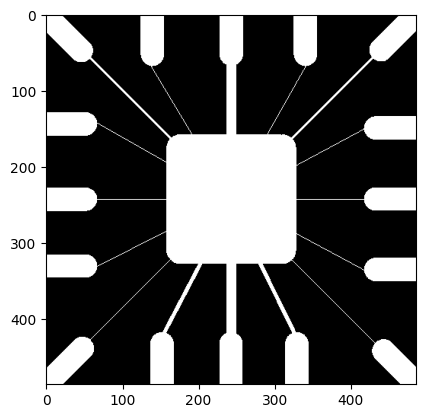

In [263]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/wirebond-mask.tif'
WirebondMask = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(WirebondMask, cmap='gray')
print('------------------------------------------------')
print("Original Image")
print('이미지 차원 : ',WirebondMask.ndim)
print('이미지 크기 : ',WirebondMask.shape)
print('이미지 전체 요소 개수 : ',WirebondMask.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',WirebondMask.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',WirebondMask.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
Erosion_1
이미지 차원 :  2
이미지 크기 :  (476, 476)
이미지 전체 요소 개수 :  226576
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


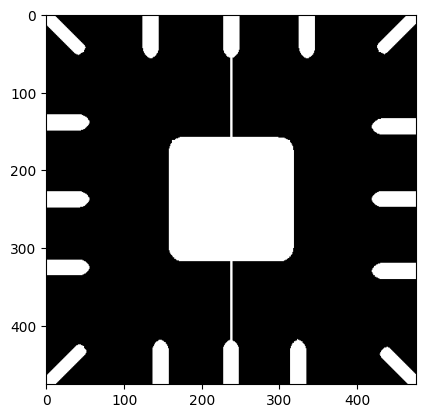

In [264]:
# Erosion 11x11
structure_1 = np.ones((11, 11))
img_Erosion_1 = Erosion(WirebondMask, structure_1, 0)
plt.figure()
plt.imshow(img_Erosion_1, cmap='gray')
print('------------------------------------------------')
print("Erosion_1")
print('이미지 차원 : ', img_Erosion_1.ndim)
print('이미지 크기 : ', img_Erosion_1.shape)
print('이미지 전체 요소 개수 : ', img_Erosion_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Erosion_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Erosion_1.itemsize) # 각 요소의 크기가 1바이트

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


------------------------------------------------
Erosion_2
이미지 차원 :  2
이미지 크기 :  (472, 472)
이미지 전체 요소 개수 :  222784
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


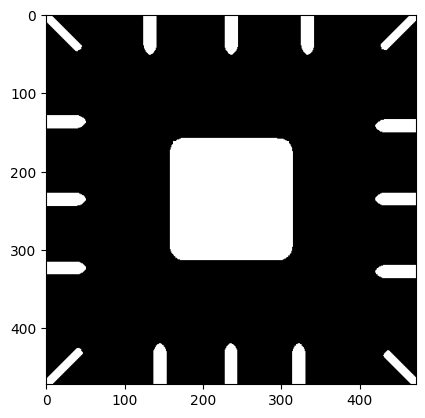

In [265]:
# Erosion 15x15
structure_2 = np.ones((15, 15))
img_Erosion_2 = Erosion(WirebondMask, structure_2, 0)
plt.figure()
plt.imshow(img_Erosion_2, cmap='gray')
print('------------------------------------------------')
print("Erosion_2")
print('이미지 차원 : ', img_Erosion_2.ndim)
print('이미지 크기 : ', img_Erosion_2.shape)
print('이미지 전체 요소 개수 : ', img_Erosion_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Erosion_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Erosion_2.itemsize) # 각 요소의 크기가 1바이트



------------------------------------------------
Erosion_3
이미지 차원 :  2
이미지 크기 :  (442, 442)
이미지 전체 요소 개수 :  195364
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


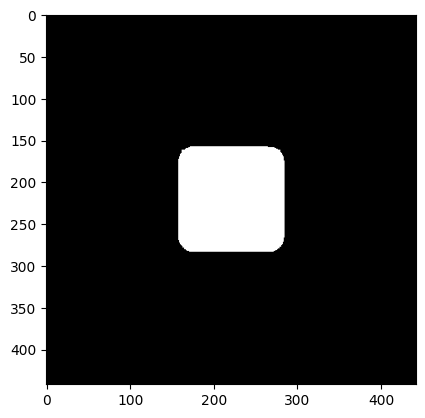

In [266]:
# Erosion 15x15
structure_3 = np.ones((45, 45))
img_Erosion_3 = Erosion(WirebondMask, structure_3, 0)
plt.figure()
plt.imshow(img_Erosion_3, cmap='gray')
print('------------------------------------------------')
print("Erosion_3")
print('이미지 차원 : ', img_Erosion_3.ndim)
print('이미지 크기 : ', img_Erosion_3.shape)
print('이미지 전체 요소 개수 : ', img_Erosion_3.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Erosion_3.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Erosion_3.itemsize) # 각 요소의 크기가 1바이트



------------------------------------------------
Original Image
이미지 차원 :  2
이미지 크기 :  (238, 315)
이미지 전체 요소 개수 :  74970
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


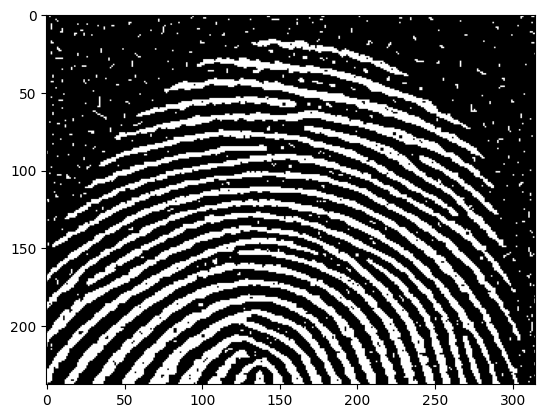

In [267]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/fingerprint-noisy.tif'
fingerprintNoisy = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(fingerprintNoisy, cmap='gray')
print('------------------------------------------------')
print("Original Image")
print('이미지 차원 : ',fingerprintNoisy.ndim)
print('이미지 크기 : ',fingerprintNoisy.shape)
print('이미지 전체 요소 개수 : ',fingerprintNoisy.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',fingerprintNoisy.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',fingerprintNoisy.itemsize) # 각 요소의 크기가 1바이트


------------------------------------------------
Erosion_4
이미지 차원 :  2
이미지 크기 :  (236, 313)
이미지 전체 요소 개수 :  73868
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


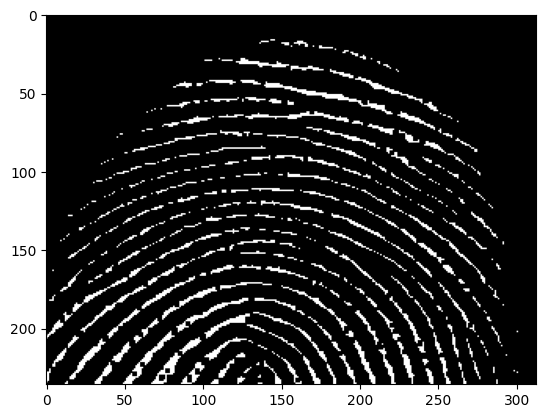

In [268]:
# Erosion 15x15
structure_4 = np.ones((3, 3))
img_Erosion_4 = Erosion(fingerprintNoisy, structure_4, 0)
plt.figure()
plt.imshow(img_Erosion_4, cmap='gray')
print('------------------------------------------------')
print("Erosion_4")
print('이미지 차원 : ', img_Erosion_4.ndim)
print('이미지 크기 : ', img_Erosion_4.shape)
print('이미지 전체 요소 개수 : ', img_Erosion_4.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Erosion_4.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Erosion_4.itemsize) # 각 요소의 크기가 1바이트

## 2.3) Opening

In [270]:
def Opening(img, structure, padding):
    (N, M) = img.shape
    (n, m) = structure.shape

    if padding == 1:
        padded_img = np.zeros((N+n-1, M+m-1))
        padded_img[int((n-1)/2):int(N+(n-1)/2), int((m-1)/2):int(M+(m-1)/2)] = img
        input_img = padded_img
    else:
        input_img = img

    (input_N, input_M) = input_img.shape
    output = np.zeros((input_N, input_M))
    temp = np.zeros((input_N, input_M))

    for i in range (input_N-(n-1)):
        for j in range(input_M-(m-1)):
            temp[i, j] = np.prod(input_img[i:i+n, j:j+m]*structure[:, :])
            if(temp[i, j])>1:
                temp[i, j] = 255
            else:
                temp[i, j] = 0

    for i in range (input_N-(n-1)):
        for j in range(input_M-(m-1)):
            output[i, j] = np.sum(temp[i:i+n, j:j+m]*structure[:, :])
            if(output[i, j])>1:
                output[i, j] = 255
            else:
                output[i, j] = 0

    if(padding == 1):
        output = output[0:N, 0:M]
    else:
        output = output[0:N-n+1, 0:M-m+1]
    output = output.astype(np.uint8)

    return output

------------------------------------------------
Opening_1
이미지 차원 :  2
이미지 크기 :  (236, 313)
이미지 전체 요소 개수 :  73868
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


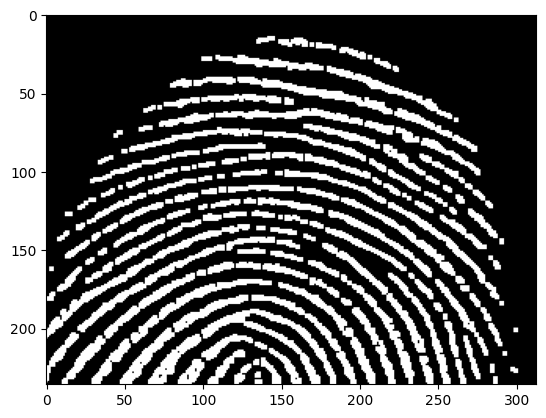

In [271]:
# 3x3
structure_1 = np.ones((3, 3))
img_Opening_1 = Opening(fingerprintNoisy, structure_1, 0)
plt.figure()
plt.imshow(img_Opening_1, cmap='gray')
print('------------------------------------------------')
print("Opening_1")
print('이미지 차원 : ', img_Opening_1.ndim)
print('이미지 크기 : ', img_Opening_1.shape)
print('이미지 전체 요소 개수 : ', img_Opening_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Opening_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Opening_1.itemsize) # 각 요소의 크기가 1바이트


## 2.4) Closing

In [272]:
def Closing(img, structure, padding):
    (N, M) = img.shape
    (n, m) = structure.shape

    if padding == 1:
        padded_img = np.zeros((N+n-1, M+m-1))
        padded_img[int((n-1)/2):int(N+(n-1)/2), int((m-1)/2):int(M+(m-1)/2)] = img
        input_img = padded_img
    else:
        input_img = img

    (input_N, input_M) = input_img.shape
    output = np.zeros((input_N, input_M))
    temp = np.zeros((input_N, input_M))

    for i in range (input_N-(n-1)):
        for j in range(input_M-(m-1)):
            temp[i, j] = np.sum(input_img[i:i+n, j:j+m]*structure[:, :])
            if(temp[i, j])>1:
                temp[i, j] = 255
            else:
                temp[i, j] = 0

    for i in range (input_N-(n-1)):
        for j in range(input_M-(m-1)):
            output[i, j] = np.prod(temp[i:i+n, j:j+m]*structure[:, :])
            if(output[i, j])>1:
                output[i, j] = 255
            else:
                output[i, j] = 0

    if(padding == 1):
        output = output[0:N, 0:M]
    else:
        output = output[0:N-n+1, 0:M-m+1]

    return output

------------------------------------------------
Closing_1
이미지 차원 :  2
이미지 크기 :  (234, 311)
이미지 전체 요소 개수 :  72774
이미지 데이터 타입 :  float64
이미지 각 요소의 바이트 크기 :  8


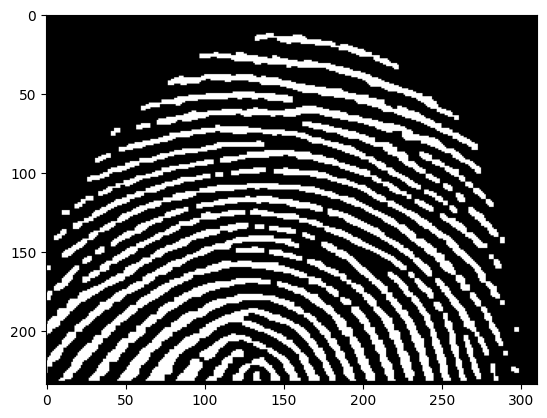

In [273]:
# 3x3
structure_1 = np.ones((3, 3))
img_Closing_1 = Closing(img_Opening_1, structure_1, 0)
plt.figure()
plt.imshow(img_Closing_1, cmap='gray')
print('------------------------------------------------')
print("Closing_1")
print('이미지 차원 : ', img_Closing_1.ndim)
print('이미지 크기 : ', img_Closing_1.shape)
print('이미지 전체 요소 개수 : ', img_Closing_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Closing_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Closing_1.itemsize) # 각 요소의 크기가 1바이트


# 3. Binary Image Thresholding
- Basic Global Thresholding
- Optimum Global Thresholding using Otsu's method
- Using Image Smooting to Improve Global Thresholding
- Multiple Thresholding
- variable Thresholding
- Multivariable Thresholding

In [20]:
def Histogram(img, option):
    (N, M) = img.shape
    output = np.zeros((256))

    for i in range (N):
        for j in range(M):
            output[img[i, j]] = output[img[i, j]] + 1

    index = np.arange(len(output))

    plt.bar(index, output)
    plt.title('Histogram', fontsize=20)
    plt.xlabel('Intensity', fontsize=18)
    plt.ylabel('Num', fontsize=18)
    plt.show()

    if option == 1:
      return output
    else:
      return None

In [21]:
def Thresh(img, intensity, binary):
    #img = np.where(img <= T, 0, img)

    if binary == 1:
      #img = np.where(img > T, 1, img)
      img = np.where(img > T, 1, np.where(img <= T, 0, img)).astype(np.uint8)
    else:
      img = np.where(img <= T, 0, img)

    return img

## 3.2) Basic Global Thresholding

In [7]:
def GlobalThresh(hist, delta):
    temp = 0
    output = np.zeros((256))
    group_1 = np.zeros((256))
    group_2 = np.zeros((256))
    index = np.arange(0, 256)
    last_T = int(sum(index*hist)/(sum(hist))) #화소의 모든 평균

    Done = False
    while ~Done:
        group_1[:int(last_T+1)] = hist[:int(last_T+1)]
        group_2[int(last_T+1):] = hist[int(last_T+1):]
        m_1 = sum(group_1*index)/sum(group_1)
        m_2 = sum(group_2*index)/sum(group_2)
        T = (m_1 + m_2)/2
        Done = abs(T-last_T) < 0.5
        last_T = T
    print("T = ", T)

    return T

Original Image
이미지 차원 :  2
이미지 크기 :  (958, 798)
이미지 전체 요소 개수 :  764484
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


<Figure size 640x480 with 0 Axes>

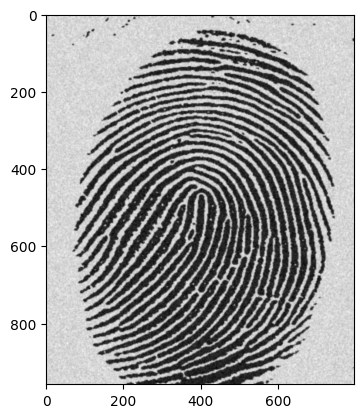

<Figure size 640x480 with 0 Axes>

In [279]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/fingerprint.tif'
fingerprint = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(fingerprint, cmap='gray')
print("Original Image")
print('이미지 차원 : ',fingerprint.ndim)
print('이미지 크기 : ',fingerprint.shape)
print('이미지 전체 요소 개수 : ',fingerprint.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',fingerprint.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',fingerprint.itemsize) # 각 요소의 크기가 1바이트

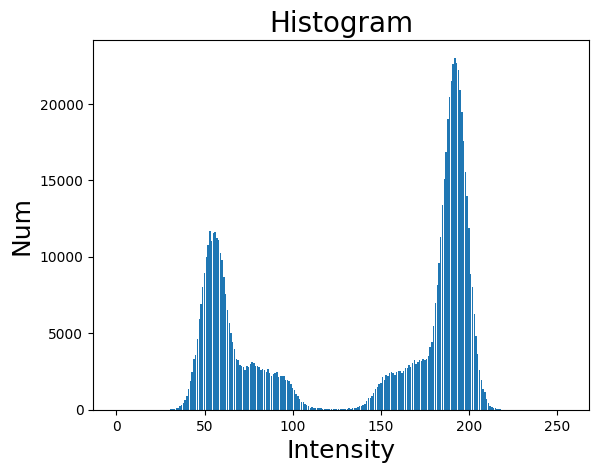

In [280]:
histogram_1 = Histogram(fingerprint, 1)

T =  125.56693076876758
------------------------------------------------
Dilation_2
이미지 차원 :  2
이미지 크기 :  (958, 798)
이미지 전체 요소 개수 :  764484
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


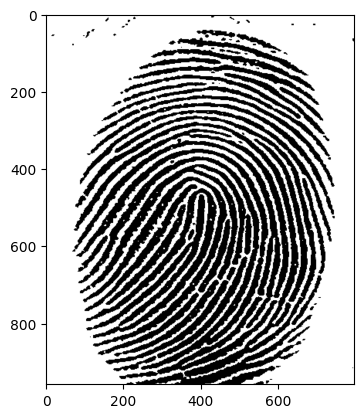

In [282]:
# Basic Global Thresholding
T = GlobalThresh(histogram_1, 0.5)
img_GlobalThresh_1 = Thresh(fingerprint, T, 1)
plt.figure()
plt.imshow(img_GlobalThresh_1, cmap='gray')
print('------------------------------------------------')
print("Dilation_2")
print('이미지 차원 : ', img_GlobalThresh_1.ndim)
print('이미지 크기 : ', img_GlobalThresh_1.shape)
print('이미지 전체 요소 개수 : ', img_GlobalThresh_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_GlobalThresh_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_GlobalThresh_1.itemsize) # 각 요소의 크기가 1바이트

Original Image
이미지 차원 :  2
이미지 크기 :  (648, 702)
이미지 전체 요소 개수 :  454896
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


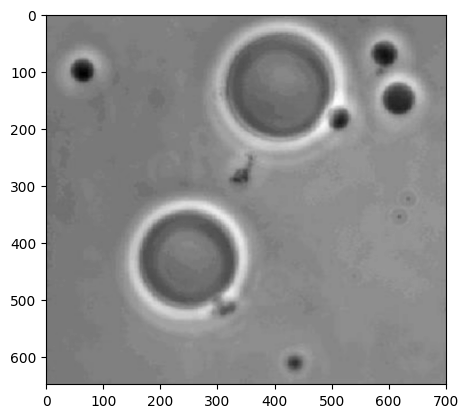

In [283]:
#img2
fname = '/content/drive/MyDrive/DesignProject/BookImages/polymercell.tif'
polymercell = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(polymercell, cmap='gray')
print("Original Image")
print('이미지 차원 : ',polymercell.ndim)
print('이미지 크기 : ',polymercell.shape)
print('이미지 전체 요소 개수 : ',polymercell.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',polymercell.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',polymercell.itemsize) # 각 요소의 크기가 1바이트

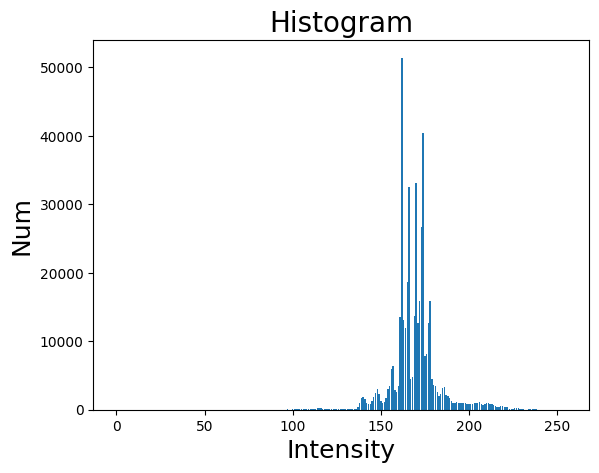

In [284]:
histogram_2 = Histogram(polymercell, 1)

T =  169.39499746303449
------------------------------------------------
Dilation_2
이미지 차원 :  2
이미지 크기 :  (648, 702)
이미지 전체 요소 개수 :  454896
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


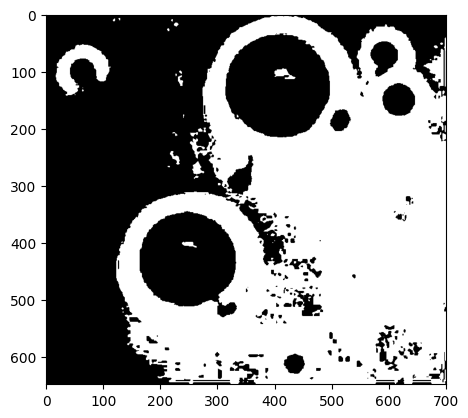

In [286]:
# Basic Global Thresholding
T = GlobalThresh(histogram_2, 0.2)
img_GlobalThresh_2 = Thresh(polymercell, T, 1)
plt.figure()
plt.imshow(img_GlobalThresh_2, cmap='gray')
print('------------------------------------------------')
print("Dilation_2")
print('이미지 차원 : ', img_GlobalThresh_2.ndim)
print('이미지 크기 : ', img_GlobalThresh_2.shape)
print('이미지 전체 요소 개수 : ', img_GlobalThresh_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_GlobalThresh_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_GlobalThresh_2.itemsize) # 각 요소의 크기가 1바이트

## 3.3) Optimum Global Thresholding using Otsu's method


In [8]:
def Otsuthresh(hist):

    index = np.arange(1, 257)
    last_T = 0
    T = 0
    P = hist/np.sum(hist)
    C = P
    m_G = sum(index*P)
    max_var = 0
    k = []

    for i in range(255):
        C[i] = 0
        m_C = sum(index*C)
        P_C = sum(C)

        if P_C !=0 and P_C != 1:
          var = (((m_G*P_C)-m_C)**2)/(P_C*(1-P_C))
          if var > max_var:
              max_var = var
              k = [i]
          elif var == max_var:
              k.append(i)
        elif P_C == 0:
          break

    T = sum(k)/len(k)
    print("T =", T)
    return T

T = 125.0
------------------------------------------------
3_2_Otsuthresh_img_1
이미지 차원 :  2
이미지 크기 :  (958, 798)
이미지 전체 요소 개수 :  764484
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


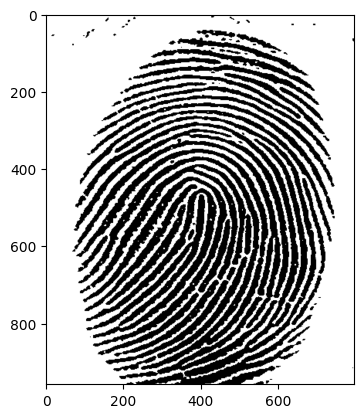

In [289]:
# Basic Global Thresholding
T = Otsuthresh(histogram_1)
img_Otsuthresh_1 = Thresh(fingerprint, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_1, cmap='gray')
print('------------------------------------------------')
print("3_2_Otsuthresh_img_1")
print('이미지 차원 : ', img_Otsuthresh_1.ndim)
print('이미지 크기 : ', img_Otsuthresh_1.shape)
print('이미지 전체 요소 개수 : ', img_Otsuthresh_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Otsuthresh_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Otsuthresh_1.itemsize) # 각 요소의 크기가 1바이트

T = 181.0
------------------------------------------------
3_2_Otsuthresh_img_2
이미지 차원 :  2
이미지 크기 :  (648, 702)
이미지 전체 요소 개수 :  454896
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


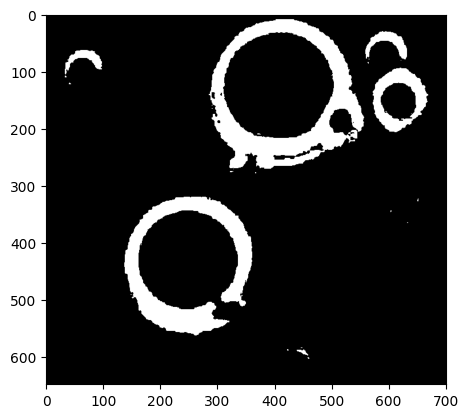

In [291]:
# Basic Global Thresholding
T = Otsuthresh(histogram_2)
img_Otsuthresh_2 = Thresh(polymercell, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_2, cmap='gray')
print('------------------------------------------------')
print("3_2_Otsuthresh_img_2")
print('이미지 차원 : ', img_Otsuthresh_2.ndim)
print('이미지 크기 : ', img_Otsuthresh_2.shape)
print('이미지 전체 요소 개수 : ', img_Otsuthresh_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Otsuthresh_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Otsuthresh_2.itemsize) # 각 요소의 크기가 1바이트


## 3.4) Using Image Smoothing to Improve Global Thresholding


In [13]:
def GaussianNoise(img, m, std):
    (N, M) = img.shape
    output = np.zeros((N, M))

    for i in range (N):
        for j in range (M):
            output[i, j] = img[i, j] + np.random.normal(m, std, 1)

    output = np.where(output < 0, 0, np.where(output > 255, 255, output))
    output = output.astype(np.uint8)

    return output

------------------------------------------------
Original Image
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


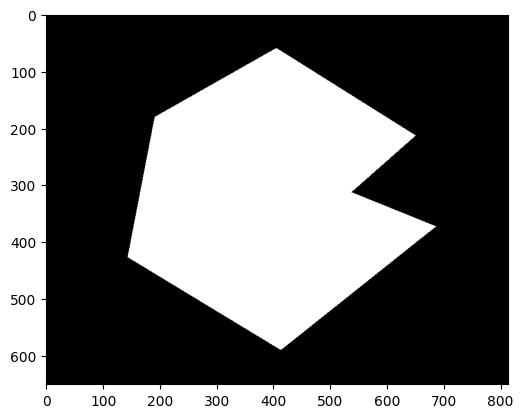

In [15]:
#img1
fname = '/content/drive/MyDrive/DesignProject/BookImages/septagon.tif'
img_septagon = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img_septagon, cmap='gray')
print('------------------------------------------------')
print("Original Image")
print('이미지 차원 : ',img_septagon.ndim)
print('이미지 크기 : ',img_septagon.shape)
print('이미지 전체 요소 개수 : ',img_septagon.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_septagon.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_septagon.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
3_3_Noise_img_1
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


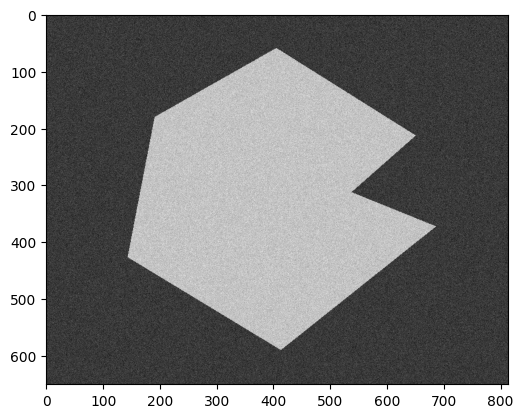

In [296]:
# Noise
Noise_img_1 = GaussianNoise(img_septagon, 0, 10)

plt.figure()
plt.imshow(Noise_img_1, cmap='gray')
print('------------------------------------------------')
print("3_3_Noise_img_1")
print('이미지 차원 : ', Noise_img_1.ndim)
print('이미지 크기 : ', Noise_img_1.shape)
print('이미지 전체 요소 개수 : ', Noise_img_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', Noise_img_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', Noise_img_1.itemsize) # 각 요소의 크기가 1바이트

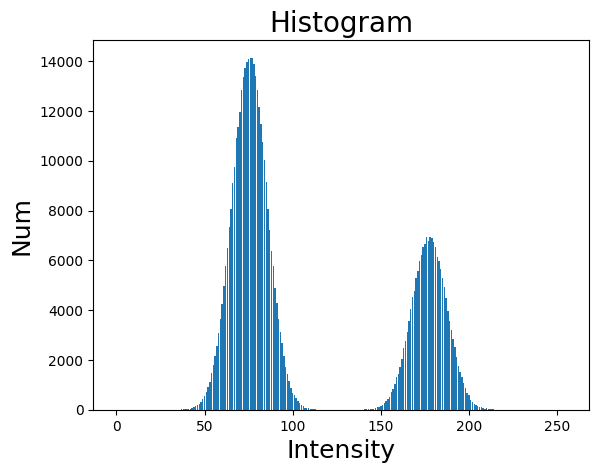

In [297]:
histogram_1 = Histogram(Noise_img_1, 1)

T = 125.5
------------------------------------------------
3_3_Otsuthresh_img_1
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


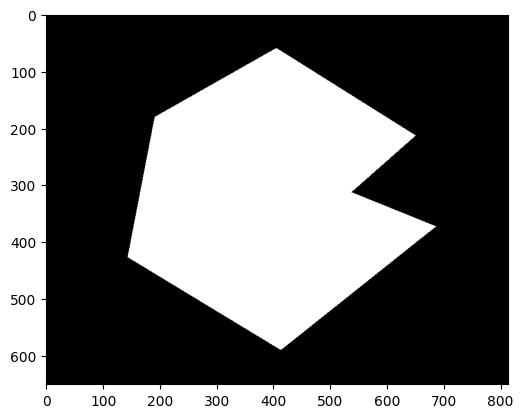

In [298]:
# Otsu's Global Thresholding
T = Otsuthresh(histogram_1)
Otsuthresh_img_1 = Thresh(Noise_img_1, T, 1)
plt.figure()
plt.imshow(Otsuthresh_img_1, cmap='gray')
print('------------------------------------------------')
print("3_3_Otsuthresh_img_1")
print('이미지 차원 : ', Otsuthresh_img_1.ndim)
print('이미지 크기 : ', Otsuthresh_img_1.shape)
print('이미지 전체 요소 개수 : ', Otsuthresh_img_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', Otsuthresh_img_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', Otsuthresh_img_1.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
3_3_Noise_img_2
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


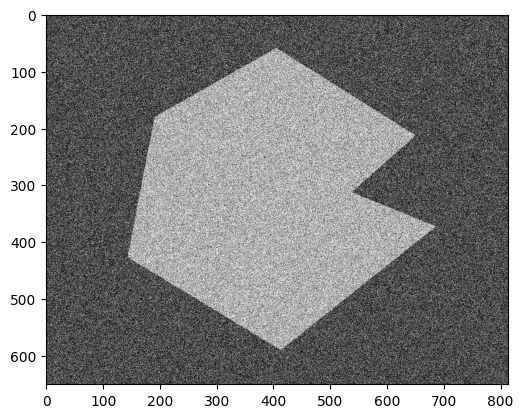

In [17]:
# Basic Global Thresholding
Noise_img_2 = GaussianNoise(img_septagon, 0, 50)
plt.figure()
plt.imshow(Noise_img_2, cmap='gray')
print('------------------------------------------------')
print("3_3_Noise_img_2")
print('이미지 차원 : ', Noise_img_2.ndim)
print('이미지 크기 : ', Noise_img_2.shape)
print('이미지 전체 요소 개수 : ', Noise_img_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', Noise_img_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', Noise_img_2.itemsize) # 각 요소의 크기가 1바이트

In [ ]:
histogram_2 = Histogram(Noise_img_2, 1)

T = 181.0
------------------------------------------------
3_3_Otsuthresh_img_1
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


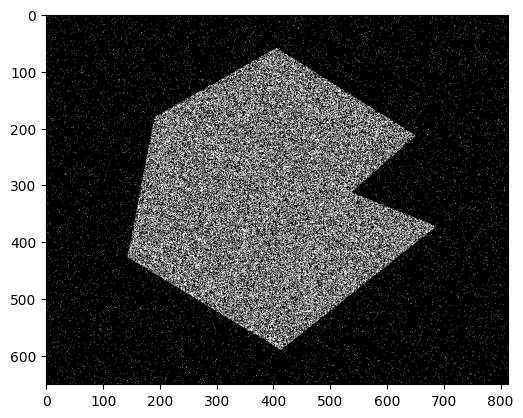

In [301]:
# Otsu's Global Thresholding
T = Otsuthresh(histogram_2)
img_Otsuthresh_2 = Thresh(Noise_img_2, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_2, cmap='gray')
print('------------------------------------------------')
print("3_3_Otsuthresh_img_1")
print('이미지 차원 : ', img_Otsuthresh_2.ndim)
print('이미지 크기 : ', img_Otsuthresh_2.shape)
print('이미지 전체 요소 개수 : ', img_Otsuthresh_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Otsuthresh_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Otsuthresh_2.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
3_3_smoothed_img
이미지 차원 :  2
이미지 크기 :  (647, 810)
이미지 전체 요소 개수 :  524070
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


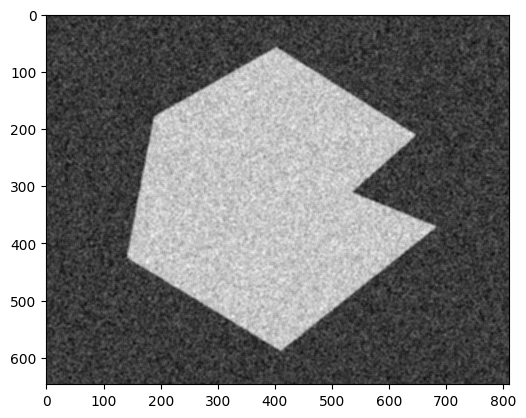

In [34]:
img_smoothed = Spatial_filtering(Noise_img_2, Boxfilter(5, 5), 0, 1)
plt.figure()
plt.imshow(img_smoothed, cmap='gray')
print('------------------------------------------------')
print("3_3_smoothed_img")
print('이미지 차원 : ', img_smoothed.ndim)
print('이미지 크기 : ', img_smoothed.shape)
print('이미지 전체 요소 개수 : ', img_smoothed.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_smoothed.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_smoothed.itemsize) # 각 요소의 크기가 1바이트

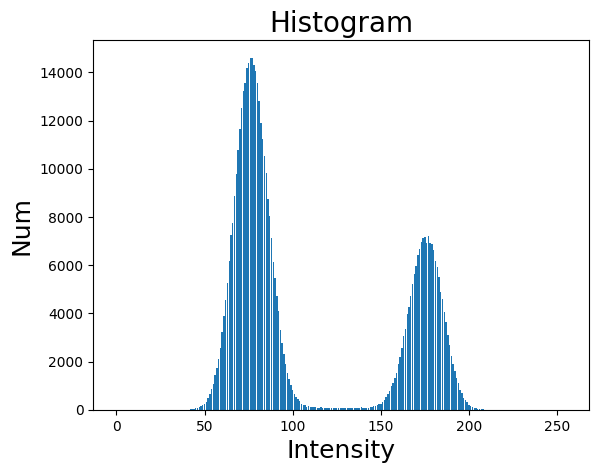

In [35]:
histogram_3 = Histogram(img_smoothed, 1)

T = 125.0
------------------------------------------------
3_3_Otsuthresh_img_1
이미지 차원 :  2
이미지 크기 :  (647, 810)
이미지 전체 요소 개수 :  524070
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


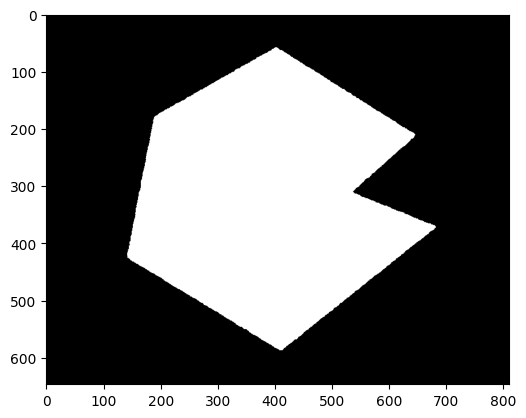

In [36]:
# Otsu's Global Thresholding
T = Otsuthresh(histogram_3)
img_Otsuthresh_3 = Thresh(img_smoothed, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_3, cmap='gray')
print('------------------------------------------------')
print("3_3_Otsuthresh_img_1")
print('이미지 차원 : ', img_Otsuthresh_3.ndim)
print('이미지 크기 : ', img_Otsuthresh_3.shape)
print('이미지 전체 요소 개수 : ', img_Otsuthresh_3.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Otsuthresh_3.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Otsuthresh_3.itemsize) # 각 요소의 크기가 1바이트

## 3.5 Using Edges to Improve Global Thresholding

------------------------------------------------
Original Image
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


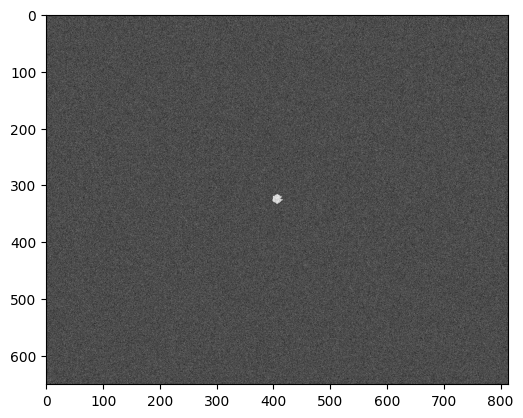

In [37]:
#img2
fname ='/content/drive/MyDrive/DesignProject/BookImages/septagon-small.tif'
SeptagonSmall = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(SeptagonSmall, cmap='gray')
print('------------------------------------------------')
print("Original Image")
print('이미지 차원 : ',SeptagonSmall.ndim)
print('이미지 크기 : ',SeptagonSmall.shape)
print('이미지 전체 요소 개수 : ',SeptagonSmall.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',SeptagonSmall.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',SeptagonSmall.itemsize) # 각 요소의 크기가 1바이트

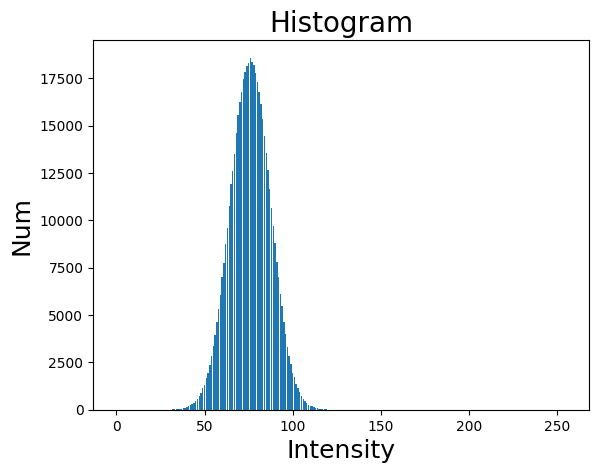

In [38]:
histogram_1 = Histogram(SeptagonSmall, 1)

T = 76.0
------------------------------------------------
3_3_Otsuthresh_img_1
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


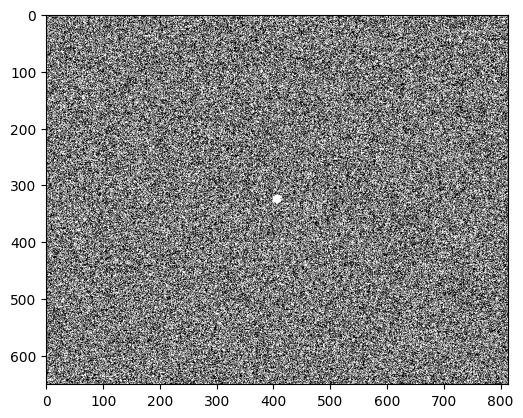

In [39]:
# Otsu's Global Thresholding
T = Otsuthresh(histogram_1)
img_Otsuthres_1 = Thresh(SeptagonSmall, T, 1)
plt.figure()
plt.imshow(img_Otsuthres_1, cmap='gray')
print('------------------------------------------------')
print("3_3_Otsuthresh_img_1")
print('이미지 차원 : ', img_Otsuthres_1.ndim)
print('이미지 크기 : ', img_Otsuthres_1.shape)
print('이미지 전체 요소 개수 : ', img_Otsuthres_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Otsuthres_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Otsuthres_1.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
3_3_smoothed_img
이미지 차원 :  2
이미지 크기 :  (647, 810)
이미지 전체 요소 개수 :  524070
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


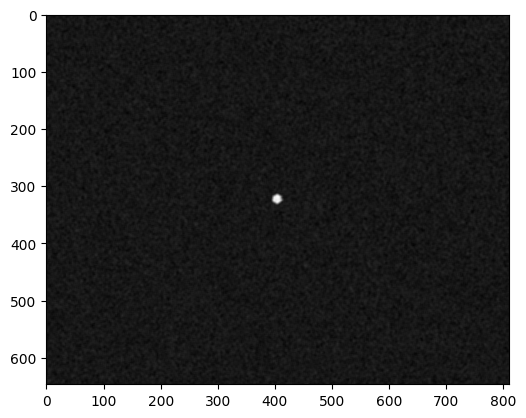

In [40]:
img_smoothed = Spatial_filtering(SeptagonSmall, Boxfilter(5, 5), 0, 1)
plt.figure()
plt.imshow(img_smoothed, cmap='gray')
print('------------------------------------------------')
print("3_3_smoothed_img")
print('이미지 차원 : ', img_smoothed.ndim)
print('이미지 크기 : ', img_smoothed.shape)
print('이미지 전체 요소 개수 : ', img_smoothed.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_smoothed.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_smoothed.itemsize) # 각 요소의 크기가 1바이트

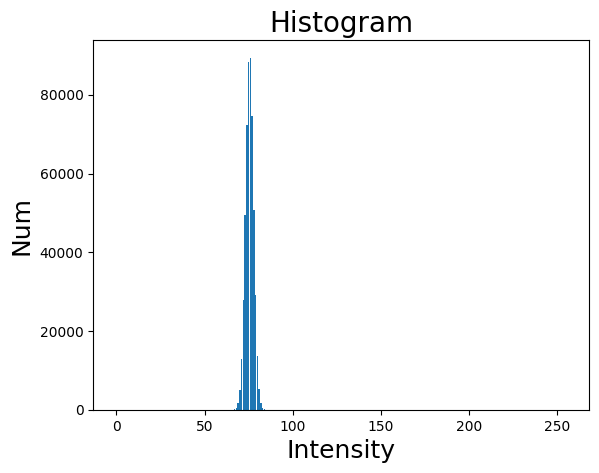

In [42]:
histogram_1 = Histogram(img_smoothed, 1)

T = 75.0
------------------------------------------------
3_3_Otsuthresh_img_1
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


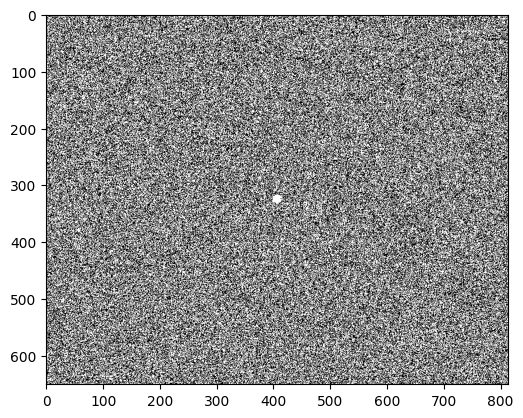

In [43]:
# Otsu's Global Thresholding
T = Otsuthresh(histogram_1)
img_Otsuthresh_smoothed = Thresh(SeptagonSmall, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_smoothed, cmap='gray')
print('------------------------------------------------')
print("3_3_Otsuthresh_img_1")
print('이미지 차원 : ', img_Otsuthresh_smoothed.ndim)
print('이미지 크기 : ', img_Otsuthresh_smoothed.shape)
print('이미지 전체 요소 개수 : ', img_Otsuthresh_smoothed.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Otsuthresh_smoothed.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Otsuthresh_smoothed.itemsize) # 각 요소의 크기가 1바이트

edge detect

------------------------------------------------
3_3_Otsuthresh_img_1
이미지 차원 :  2
이미지 크기 :  (649, 812)
이미지 전체 요소 개수 :  526988
이미지 데이터 타입 :  float64
이미지 각 요소의 바이트 크기 :  8


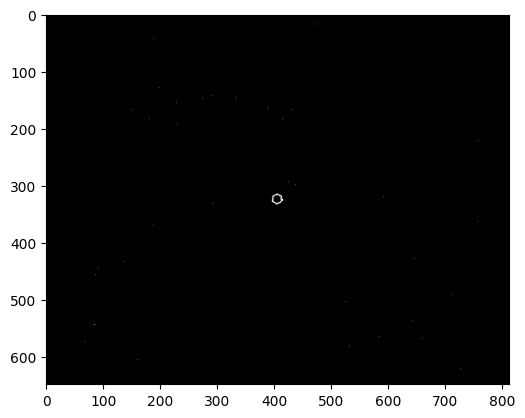

In [44]:
img_h = abs(Spatial_filtering(SeptagonSmall, Sobelfilter(0), 0, 0))
img_v = abs(Spatial_filtering(SeptagonSmall, Sobelfilter(1), 0, 0))
img_edge = img_h + img_v
img_edge_mask = img_edge/np.max(img_edge) #정규화
#img_edge_mask = Thresh(img_edge_mask, np.percentile(img_edge_mask, 99.97), 1)
T = np.percentile(img_edge_mask, 99.97)
img_edge_mask = np.where(img_edge_mask <= T, 0, img_edge_mask)
img_edge_mask = np.where(img_edge_mask > T, 1, img_edge_mask)
plt.figure()
plt.imshow(img_edge_mask , cmap='gray')

print('------------------------------------------------')
print("3_3_Otsuthresh_img_1")
print('이미지 차원 : ', img_edge_mask.ndim)
print('이미지 크기 : ', img_edge_mask.shape)
print('이미지 전체 요소 개수 : ', img_edge_mask.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_edge_mask.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_edge_mask.itemsize) # 각 요소의 크기가 1바이트

------------------------------------------------
3_4_img_Masked_
이미지 차원 :  2
이미지 크기 :  (649, 812)
이미지 전체 요소 개수 :  526988
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


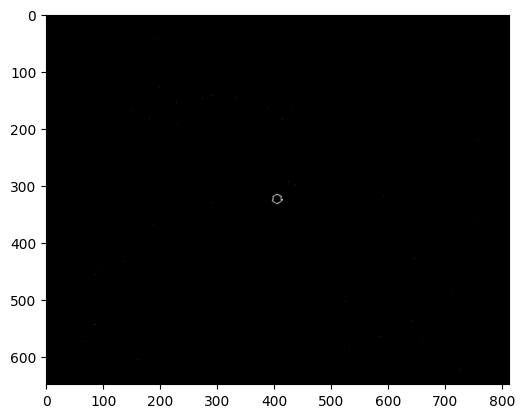

In [45]:
img_Masked = (img_edge_mask * SeptagonSmall[1:650, 1:813]).astype(np.uint8)
plt.figure()
plt.imshow(img_Masked, cmap='gray')

print('------------------------------------------------')
print("3_4_img_Masked_")
print('이미지 차원 : ', img_Masked.ndim)
print('이미지 크기 : ', img_Masked.shape)
print('이미지 전체 요소 개수 : ', img_Masked.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Masked.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Masked.itemsize) # 각 요소의 크기가 1바이트

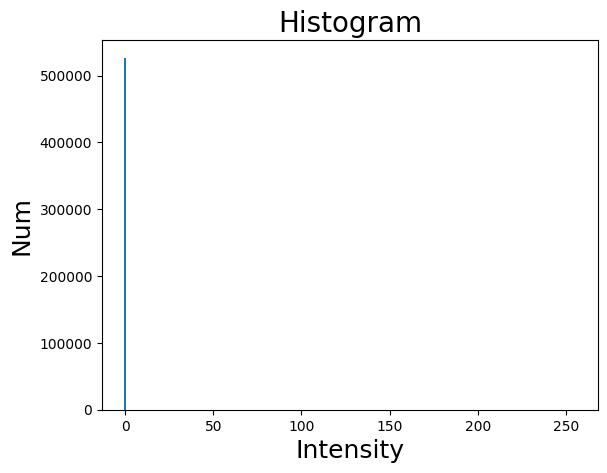

In [46]:
histogram_2 = Histogram(img_Masked, 1)

In [47]:
histogram_2[0] = 0

T = 133.5
------------------------------------------------
3_4_img_Otsuthresh_2
이미지 차원 :  2
이미지 크기 :  (651, 814)
이미지 전체 요소 개수 :  529914
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


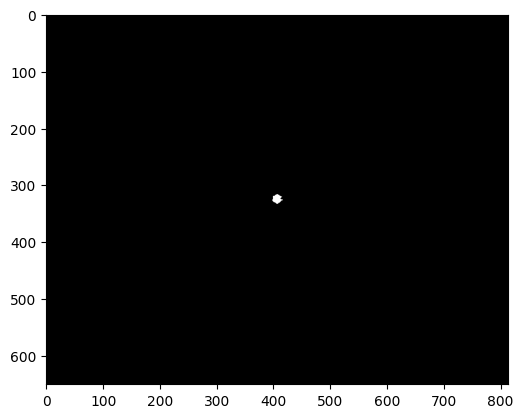

In [48]:
# Basic Global Thresholding
T = Otsuthresh(histogram_2)
img_Otsuthresh_2 = Thresh(SeptagonSmall, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_2 , cmap='gray')
print('------------------------------------------------')
print("3_4_img_Otsuthresh_2")
print('이미지 차원 : ', img_Otsuthresh_2.ndim)
print('이미지 크기 : ', img_Otsuthresh_2.shape)
print('이미지 전체 요소 개수 : ', img_Otsuthresh_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ', img_Otsuthresh_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ', img_Otsuthresh_2.itemsize) # 각 요소의 크기가 1바이트


## 3.6) Multiple Thresholds


In [49]:
def MultipleThresh(hist):

    index = np.arange(1, 257)
    last_T = 0
    T = 0
    P = hist/np.sum(hist)

    m_G = sum(index*P)
    max_var = 0
    k_1 = []
    k_2 = []

    for i in range (255):
      for j in range (255):
        P_1 = np.sum(P[0:i])
        P_2 = np.sum(P[i:j])
        P_3 = np.sum(P[j:])

        if (P_1 != 0 and P_2 !=0 and P_3 !=0):

          m_1 = sum(P[0:i]*index[0:i])/P_1
          m_2 = sum(P[i:j]*index[i:j])/P_2
          m_3 = sum(P[j:]*index[j:])/P_3

          var = P_1*((m_1-m_G)**2) + P_2*((m_2-m_G)**2) + P_3*((m_3-m_G)**2)

          if var > max_var:
            max_var = var
            k_1 = [i]
            k_2 = [j]

          elif var == max_var:
              k_1.append(i)
              k_2.append(j)

        elif P_3 == 0:
          break

      if P_2 == 0:
          break

    T_1 = sum(k_1)/len(k_1)
    T_2 = sum(k_2)/len(k_2)
    print("T_1 =", T_1, "T_2 =", T_2)

    return T_1, T_2

Original Image
이미지 차원 :  2
이미지 크기 :  (533, 566)
이미지 전체 요소 개수 :  301678
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


<Figure size 640x480 with 0 Axes>

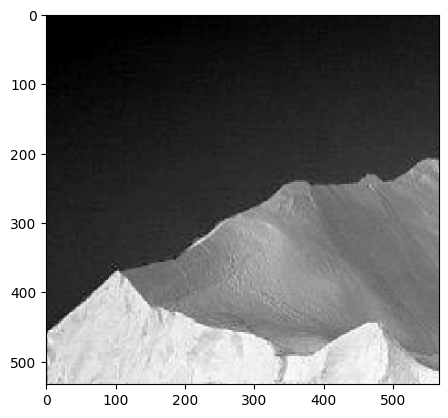

<Figure size 640x480 with 0 Axes>

In [50]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/iceberg.tif'
iceberg = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(iceberg, cmap='gray')
print("Original Image")
print('이미지 차원 : ',iceberg.ndim)
print('이미지 크기 : ',iceberg.shape)
print('이미지 전체 요소 개수 : ',iceberg.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',iceberg.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',iceberg.itemsize) # 각 요소의 크기가 1바이트
plt.figure()

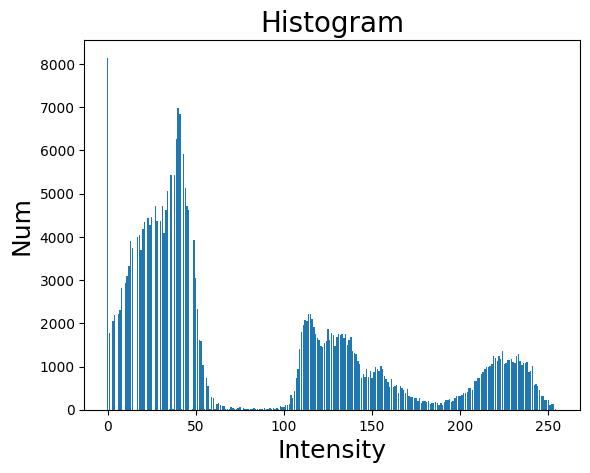

In [51]:
histogram_1 = Histogram(iceberg, 1)

In [52]:
x = MultipleThresh(histogram_1)

T_1 = 81.0 T_2 = 178.0


Original Image
이미지 차원 :  2
이미지 크기 :  (533, 566)
이미지 전체 요소 개수 :  301678
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


<Figure size 640x480 with 0 Axes>

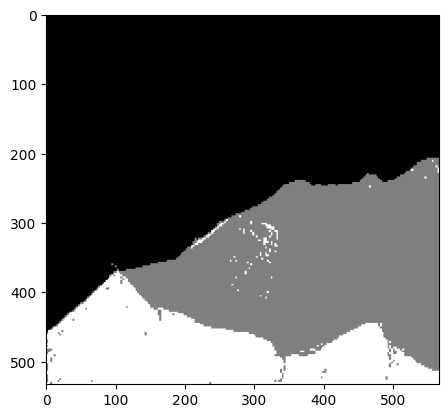

<Figure size 640x480 with 0 Axes>

In [55]:
img_MultipleThresh = np.where(iceberg <= x[0], 0, np.where(iceberg <= x[1], 127, np.where(iceberg > x[1], 255, iceberg)))
plt.figure()
plt.imshow(img_MultipleThresh, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_MultipleThresh.ndim)
print('이미지 크기 : ',img_MultipleThresh.shape)
print('이미지 전체 요소 개수 : ',img_MultipleThresh.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_MultipleThresh.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_MultipleThresh.itemsize) # 각 요소의 크기가 1바이트
plt.figure()

## 3.7) variable Thresholding

### - Image Partitioning

Original Image
이미지 차원 :  2
이미지 크기 :  (741, 924)
이미지 전체 요소 개수 :  684684
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


<Figure size 640x480 with 0 Axes>

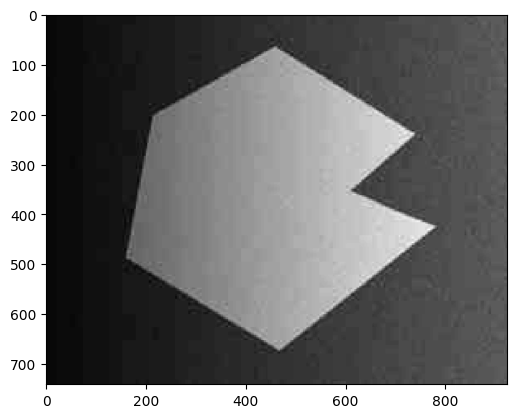

<Figure size 640x480 with 0 Axes>

In [56]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/septagon_shaded.tif'
septagonShaded = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(septagonShaded, cmap='gray')
print("Original Image")
print('이미지 차원 : ',septagonShaded.ndim)
print('이미지 크기 : ',septagonShaded.shape)
print('이미지 전체 요소 개수 : ',septagonShaded.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',septagonShaded.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',septagonShaded.itemsize) # 각 요소의 크기가 1바이트
plt.figure()

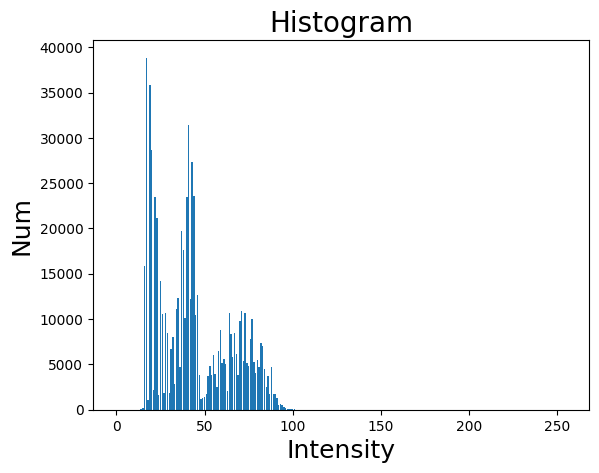

In [57]:
histogram_1 = Histogram(septagonShaded, 1)

T = 50.0
50.0
Original Image
이미지 차원 :  2
이미지 크기 :  (741, 924)
이미지 전체 요소 개수 :  684684
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


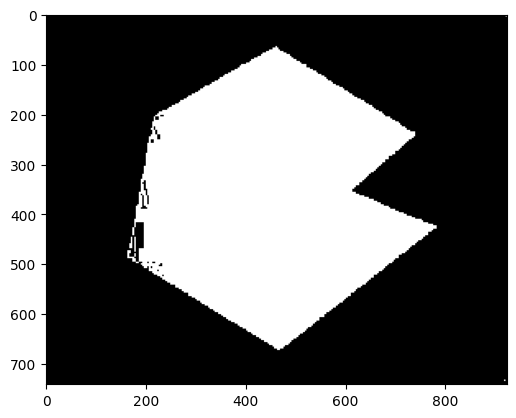

In [59]:
# Basic Global Thresholding
T = Otsuthresh(histogram_1)
print(T)
img_Otsuthresh_1 = Thresh(septagonShaded, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_1, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_Otsuthresh_1.ndim)
print('이미지 크기 : ',img_Otsuthresh_1.shape)
print('이미지 전체 요소 개수 : ',img_Otsuthresh_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Otsuthresh_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Otsuthresh_1.itemsize) # 각 요소의 크기가 1바이트

(741, 924)
(3, 370, 308)
(3, 371, 308)


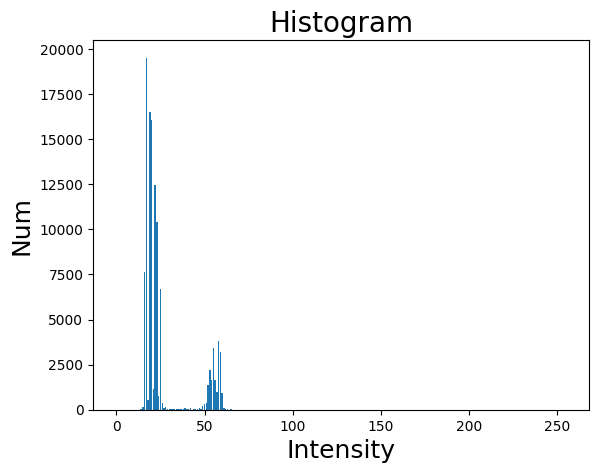

T = 37.0


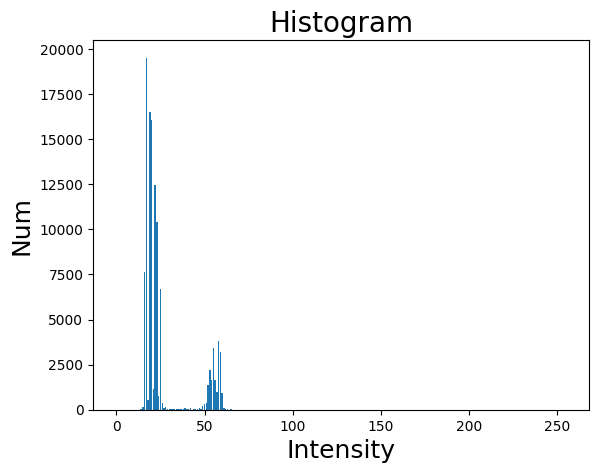

T = 37.0


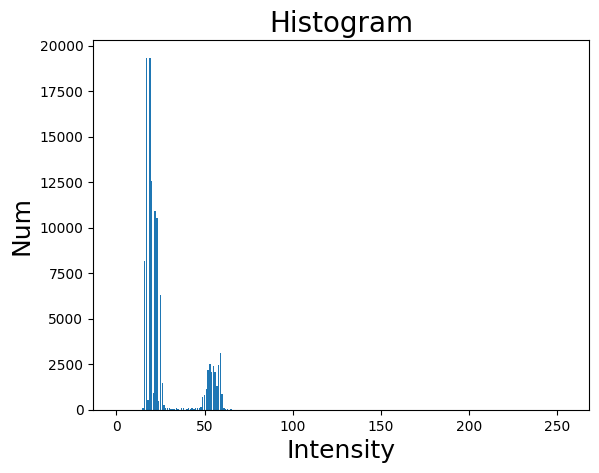

T = 37.0
37.0


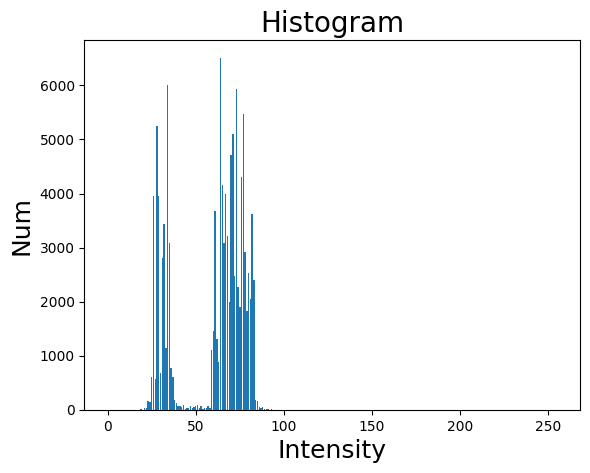

T = 51.0


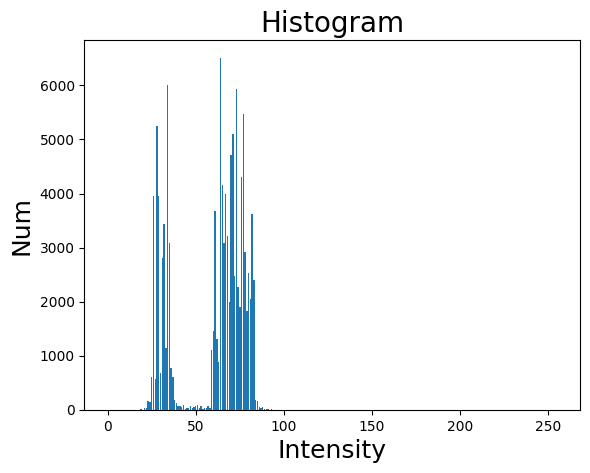

T = 51.0


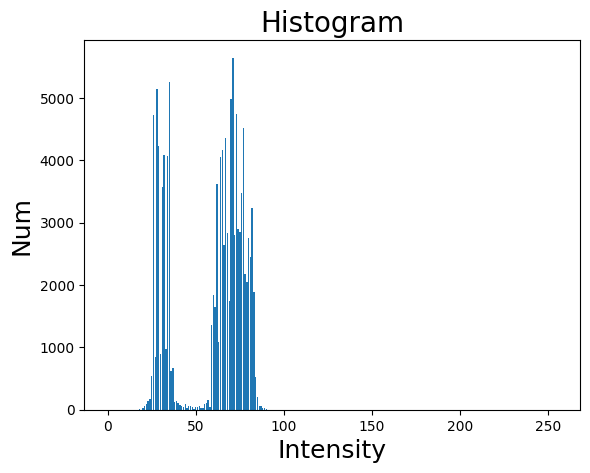

T = 51.0
51.0


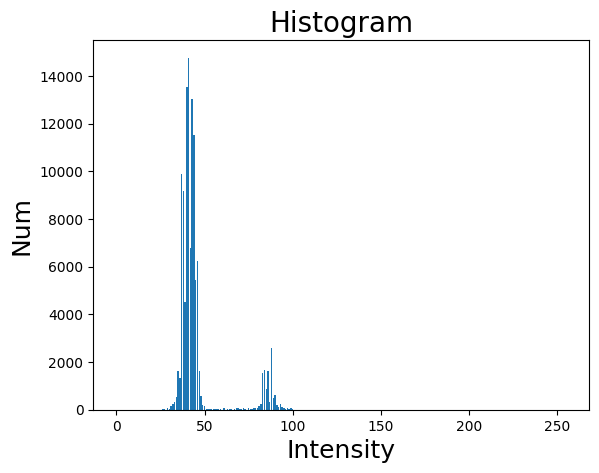

T = 63.0


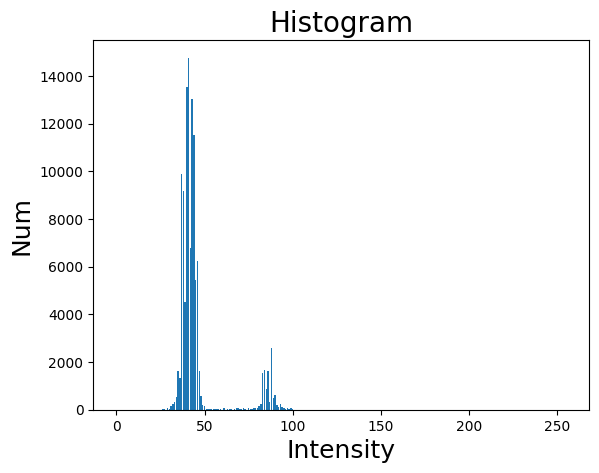

T = 63.0


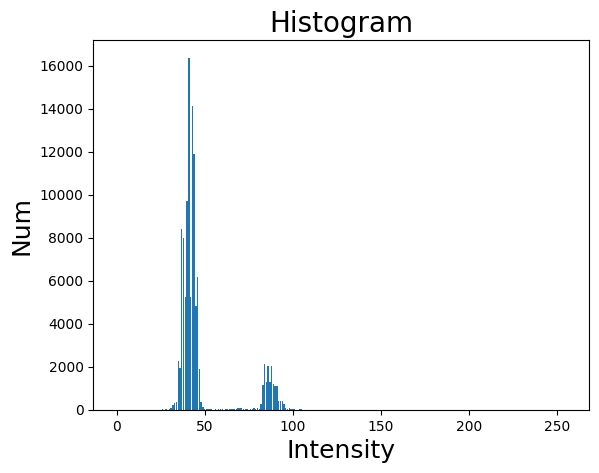

T = 64.0
63.0


In [61]:
a = septagonShaded[0:370]
b = septagonShaded[370:]
print(septagonShaded.shape)

a = np.array(np.split(a, 3, axis=1))
b = np.array(np.split(b, 3, axis=1))

print(a.shape)
print(b.shape)

for i in range(3):
  T = Otsuthresh(Histogram(a[i], 1))
  a[i] = Thresh(a[i], Otsuthresh(Histogram(a[i], 1)), 1)
  b[i] = Thresh(b[i], Otsuthresh(Histogram(b[i], 1)), 1)
  print(T)

Original Image
이미지 차원 :  2
이미지 크기 :  (741, 924)
이미지 전체 요소 개수 :  684684
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


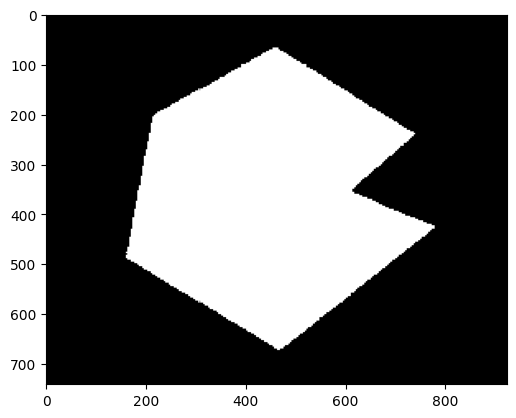

In [62]:
x = np.concatenate([a[0], a[1], a[2]], 1)
y = np.concatenate([b[0], b[1], b[2]], 1)
img_seg = np.concatenate([x, y], 0)
plt.figure()
plt.imshow(img_seg, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_seg.ndim)
print('이미지 크기 : ',img_seg.shape)
print('이미지 전체 요소 개수 : ',img_seg.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_seg.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_seg.itemsize) # 각 요소의 크기가 1바이트

### - Variable thresholding based on local image properties

In [73]:
def VariableThresh_local_var(img):
  (m, n) = img.shape
  output = np.zeros((m, n))

  for i in range (m-2):
    for j in range (n-2):
      output[i, j] = np.std(img[i:i+3, j:j+3])
  return output

In [74]:
def VariableThresh_local(img, a, b):
  (m, n) = img.shape
  output = np.zeros((m, n))
  m_g = np.mean(img)

  for i in range (m-2):
    for j in range (n-2):
#      T = a*(np.std(img[i:i+3, j:j+3])) + (b*m_g)
#      if img[i+1][j+1] > T:
#        output[i][j] = 1

      if (img[i+1][j+1] > a*(np.std(img[i:i+3, j:j+3]))) and (img[i+1][j+1] > (b*m_g)):
#        if (img[i+1][j+1] > b*(np.mean(img[i:i+3, j:j+3]))):
          output[i][j] = 1

  return output

Original Image
이미지 차원 :  2
이미지 크기 :  (818, 710)
이미지 전체 요소 개수 :  580780
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


<Figure size 640x480 with 0 Axes>

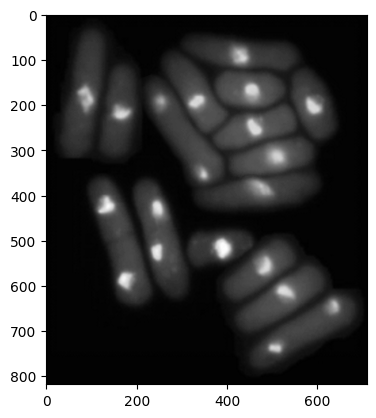

<Figure size 640x480 with 0 Axes>

In [63]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/yeast-cells.tif'
yeastCell = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(yeastCell, cmap='gray')
print("Original Image")
print('이미지 차원 : ',yeastCell.ndim)
print('이미지 크기 : ',yeastCell.shape)
print('이미지 전체 요소 개수 : ',yeastCell.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',yeastCell.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',yeastCell.itemsize) # 각 요소의 크기가 1바이트
plt.figure()

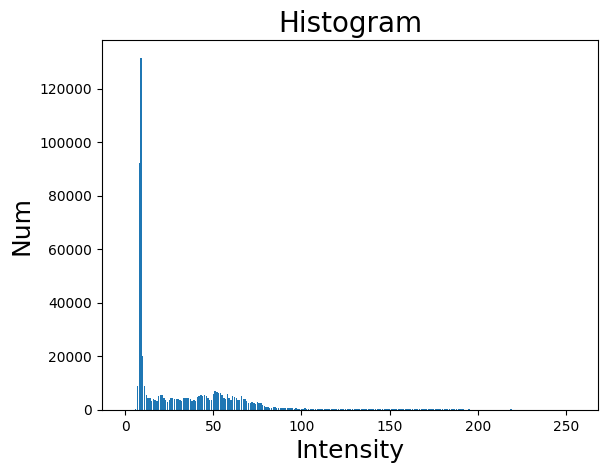

In [65]:
histogram_img = Histogram(yeastCell, 1)

In [66]:
x = MultipleThresh(histogram_img)

T_1 = 35.0 T_2 = 102.0


Original Image
이미지 차원 :  2
이미지 크기 :  (818, 710)
이미지 전체 요소 개수 :  580780
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


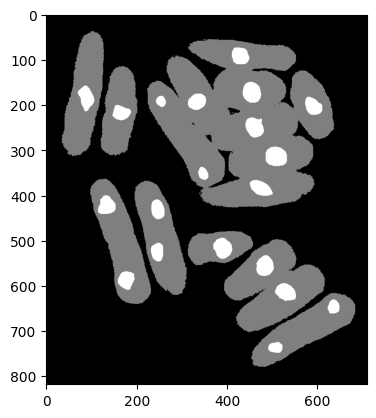

In [75]:
img_MultipleThresh = np.where(yeastCell <= x[0], 0, np.where(yeastCell <= x[1], 127, np.where(yeastCell > x[1], 255, yeastCell)))
plt.figure()
plt.imshow(img_MultipleThresh, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_MultipleThresh.ndim)
print('이미지 크기 : ',img_MultipleThresh.shape)
print('이미지 전체 요소 개수 : ',img_MultipleThresh.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_MultipleThresh.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_MultipleThresh.itemsize) # 각 요소의 크기가 1바이트

Original Image
이미지 차원 :  2
이미지 크기 :  (818, 710)
이미지 전체 요소 개수 :  580780
이미지 데이터 타입 :  float64
이미지 각 요소의 바이트 크기 :  8


<Figure size 640x480 with 0 Axes>

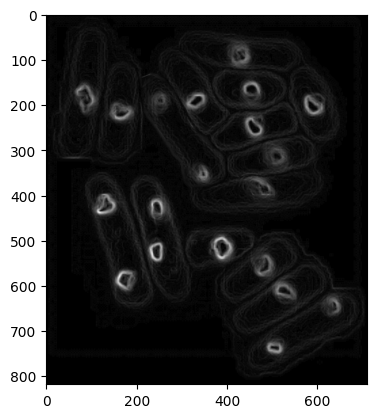

<Figure size 640x480 with 0 Axes>

In [69]:
img_variable_thresh = VariableThresh_local_var(yeastCell)
plt.figure()
plt.imshow(img_variable_thresh, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_variable_thresh.ndim)
print('이미지 크기 : ',img_variable_thresh.shape)
print('이미지 전체 요소 개수 : ',img_variable_thresh.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_variable_thresh.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_variable_thresh.itemsize) # 각 요소의 크기가 1바이트
plt.figure()

Original Image
이미지 차원 :  2
이미지 크기 :  (818, 710)
이미지 전체 요소 개수 :  580780
이미지 데이터 타입 :  float64
이미지 각 요소의 바이트 크기 :  8


<Figure size 640x480 with 0 Axes>

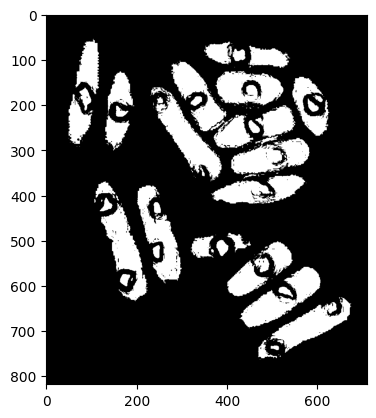

<Figure size 640x480 with 0 Axes>

In [72]:
img_variable_thresh = VariableThresh_local(yeastCell, 30, 1.5)
plt.figure()
plt.imshow(img_variable_thresh, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_variable_thresh.ndim)
print('이미지 크기 : ',img_variable_thresh.shape)
print('이미지 전체 요소 개수 : ',img_variable_thresh.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_variable_thresh.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_variable_thresh.itemsize) # 각 요소의 크기가 1바이트
plt.figure()

### - Using moving averages

In [79]:
def MovAverage(img, n, b):
  (N, M) = img.shape
  output = np.ones((N, M))

  padded_img = np.pad(img, ((0,0),(0,n-1)), 'constant', constant_values=0).astype(np.float64)
  for i in range(N):
    mov_ave = np.mean(img[i][0:n])
    for j in range(M-1):
      mov_ave = mov_ave + (padded_img[i][j+n]-padded_img[i][j])/n
      if img[i][j+1] <= (b * mov_ave):
        output[i][j+1] = 0
  return output

Original Image
이미지 차원 :  2
이미지 크기 :  (686, 772)
이미지 전체 요소 개수 :  529592
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


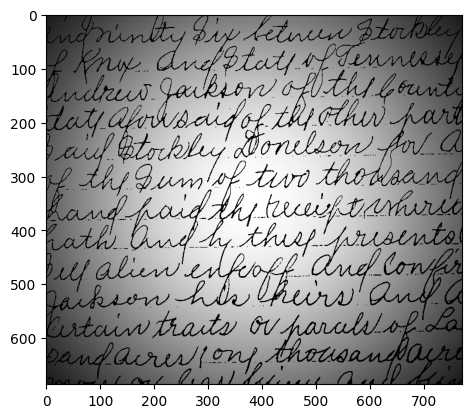

In [76]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/text-spotshade.tif'
textSpotshade = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(textSpotshade, cmap='gray')
print("Original Image")
print('이미지 차원 : ',textSpotshade.ndim)
print('이미지 크기 : ',textSpotshade.shape)
print('이미지 전체 요소 개수 : ',textSpotshade.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',textSpotshade.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',textSpotshade.itemsize) # 각 요소의 크기가 1바이트

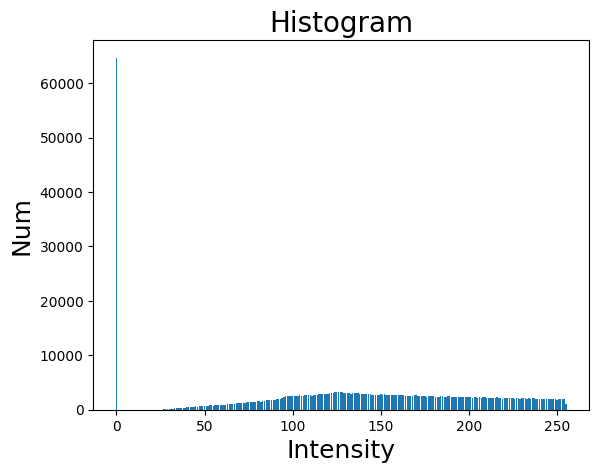

In [83]:
histogram_1 = Histogram(textSpotshade, 1)

T = 124.0
124.0
Original Image
이미지 차원 :  2
이미지 크기 :  (686, 772)
이미지 전체 요소 개수 :  529592
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


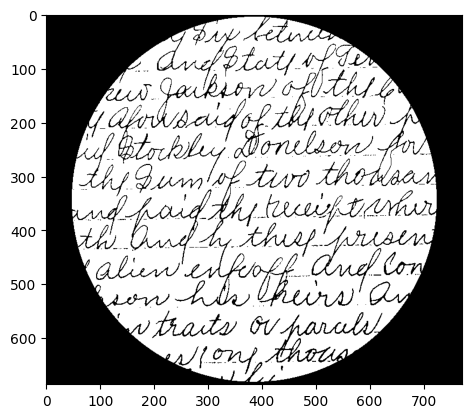

In [84]:
# Basic Global Thresholding
T = Otsuthresh(histogram_1)
img_Otsuthresh_1 = Thresh(textSpotshade, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_1, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_Otsuthresh_1.ndim)
print('이미지 크기 : ',img_Otsuthresh_1.shape)
print('이미지 전체 요소 개수 : ',img_Otsuthresh_1.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Otsuthresh_1.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Otsuthresh_1.itemsize) # 각 요소의 크기가 1바이트

Original Image
이미지 차원 :  2
이미지 크기 :  (686, 772)
이미지 전체 요소 개수 :  529592
이미지 데이터 타입 :  float64
이미지 각 요소의 바이트 크기 :  8


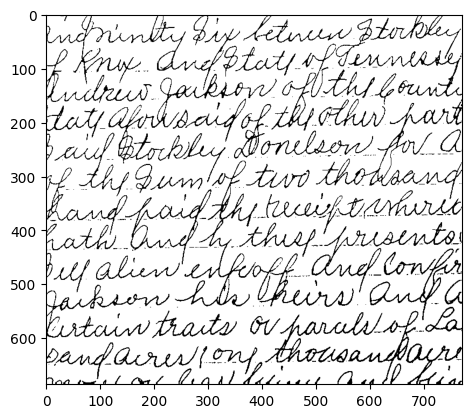

In [80]:
# Basic Global Thresholding
img_MovAverage = MovAverage(textSpotshade, 20, 0.5)
plt.figure()
plt.imshow(img_MovAverage, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_MovAverage.ndim)
print('이미지 크기 : ',img_MovAverage.shape)
print('이미지 전체 요소 개수 : ',img_MovAverage.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_MovAverage.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_MovAverage.itemsize) # 각 요소의 크기가 1바이트

Original Image
이미지 차원 :  2
이미지 크기 :  (686, 772)
이미지 전체 요소 개수 :  529592
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


<Figure size 640x480 with 0 Axes>

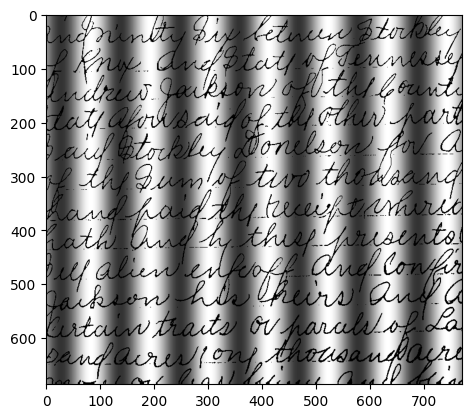

<Figure size 640x480 with 0 Axes>

In [81]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/text-sineshade.tif'
textSineshade = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(textSineshade, cmap='gray')
print("Original Image")
print('이미지 차원 : ',textSineshade.ndim)
print('이미지 크기 : ',textSineshade.shape)
print('이미지 전체 요소 개수 : ',textSineshade.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',textSineshade.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',textSineshade.itemsize) # 각 요소의 크기가 1바이트
plt.figure()

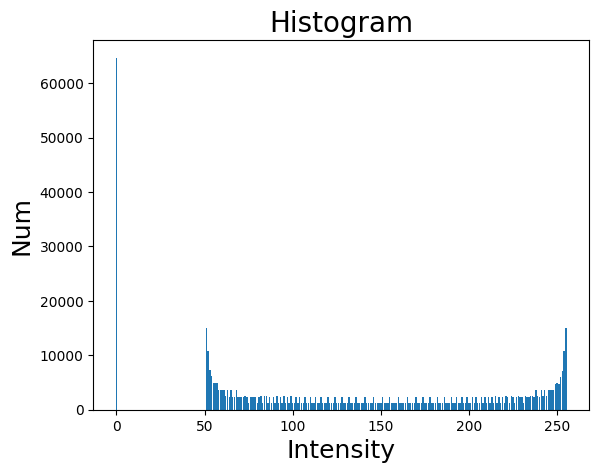

In [85]:
histogram_2 = Histogram(textSineshade, 1)

T = 136.0
136.0
Original Image
이미지 차원 :  2
이미지 크기 :  (686, 772)
이미지 전체 요소 개수 :  529592
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


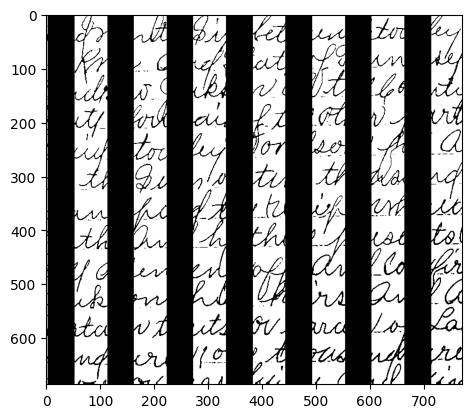

In [88]:
# Basic Global Thresholding
T = Otsuthresh(histogram_2)
img_Otsuthresh_2 = Thresh(textSineshade, T, 1)
plt.figure()
plt.imshow(img_Otsuthresh_2, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_Otsuthresh_2.ndim)
print('이미지 크기 : ',img_Otsuthresh_2.shape)
print('이미지 전체 요소 개수 : ',img_Otsuthresh_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_Otsuthresh_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_Otsuthresh_2.itemsize) # 각 요소의 크기가 1바이트

Original Image
이미지 차원 :  2
이미지 크기 :  (686, 772)
이미지 전체 요소 개수 :  529592
이미지 데이터 타입 :  float64
이미지 각 요소의 바이트 크기 :  8


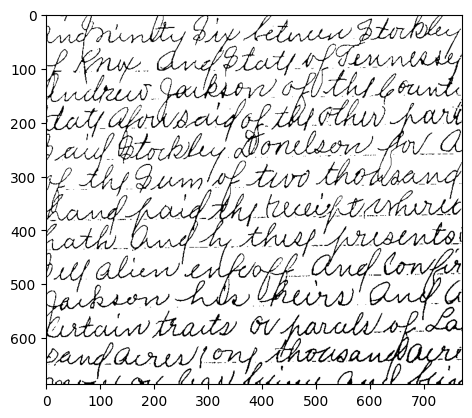

In [89]:
# Basic Global Thresholding
img_MovAverage_2 = MovAverage(textSineshade, 20, 0.5)
plt.figure()
plt.imshow(img_MovAverage_2, cmap='gray')
print("Original Image")
print('이미지 차원 : ',img_MovAverage_2.ndim)
print('이미지 크기 : ',img_MovAverage_2.shape)
print('이미지 전체 요소 개수 : ',img_MovAverage_2.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_MovAverage_2.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_MovAverage_2.itemsize) # 각 요소의 크기가 1바이트

## 3.8) Multivariable Thresholding

In [90]:
def MultivariableThresh(img, a, distance):
  (m, n, c) = img.shape
  output = img.copy()

  for i in range(m):
    for j in range(n):
      d = math.sqrt((img[i][j]-a)@((img[i][j]-a).reshape(-1, 1)))
      if d > distance:
        output[i][j] = 0
  return output

Original Image
이미지 차원 :  3
이미지 크기 :  (416, 556, 3)
이미지 전체 요소 개수 :  693888
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


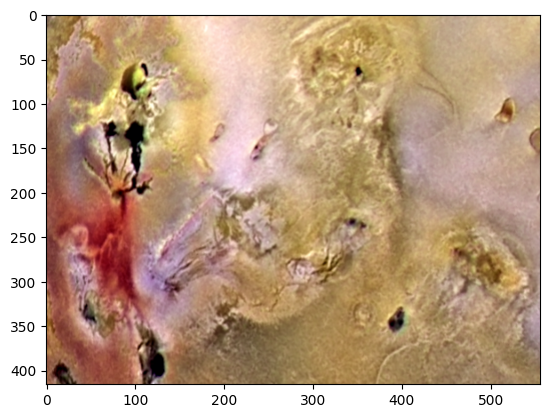

In [94]:
fname = '/content/drive/MyDrive/DesignProject/BookImages/jupiter-moon-closeup.tif'
jupiter = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(jupiter)
print("Original Image")
print('이미지 차원 : ',jupiter.ndim)
print('이미지 크기 : ',jupiter.shape)
print('이미지 전체 요소 개수 : ',jupiter.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',jupiter.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',jupiter.itemsize) # 각 요소의 크기가 1바이트

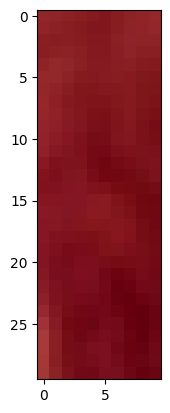

In [95]:
img_crop = jupiter[270:300, 80:90]
plt.figure()
plt.imshow(img_crop)

Original Image
이미지 차원 :  3
이미지 크기 :  (416, 556, 3)
이미지 전체 요소 개수 :  693888
이미지 데이터 타입 :  uint8
이미지 각 요소의 바이트 크기 :  1


<Figure size 640x480 with 0 Axes>

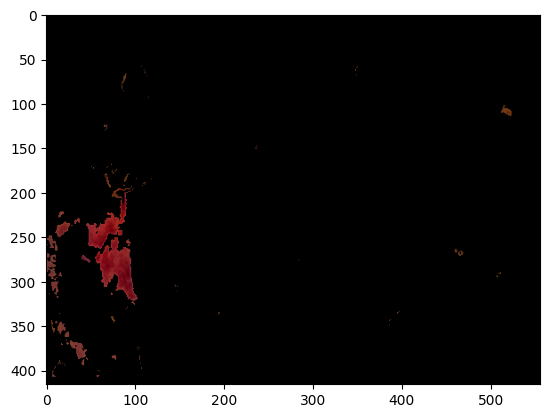

<Figure size 640x480 with 0 Axes>

In [96]:
T = np.mean(img_crop, axis = (0, 1))
img_MultiThresh = MultivariableThresh(jupiter, T, 50)

plt.figure()
plt.imshow(img_MultiThresh)
print("Original Image")
print('이미지 차원 : ',img_MultiThresh.ndim)
print('이미지 크기 : ',img_MultiThresh.shape)
print('이미지 전체 요소 개수 : ',img_MultiThresh.size) # 전체 요소의 개수
print('이미지 데이터 타입 : ',img_MultiThresh.dtype) # 부호없는 8비트 ( 이미지 픽셀은 음수나 소수점이 없다)
print('이미지 각 요소의 바이트 크기 : ',img_MultiThresh.itemsize) # 각 요소의 크기가 1바이트
plt.figure()